**รายชื่อสมาชิกในกลุ่ม** (ดับเบิลคลิกหรือดับเบิลแท็บเซลล์นี้เพื่อกรอกข้อมูล)
1. นายพินิจนันท์ สมบัติพูนผล 07590527
2. นายวันชัย เทียนธนะวัฒน์ 07590542
3. ???

## จุดประสงค์การเรียนรู้
ในแบบฝึกหัดนี้ เราจะต่อยอดจากงานที่เราทำในแบบฝึกหัดที่แล้วในสี่ประเด็นคือ (1) จะทดลองฝึกตัวแบบมากขึ้นให้ไปถึง 50 epochs (ตามมาตรฐานของงานยุคใหม่จะทำที่ประมาณ 200 epochs) แต่ด้วยข้อจำกัดของฮาร์ดแวร์ของนักศึกษาจำนวนมาก เราจะให้การฝึกสิ้นสุดที่ 50 epochs นั่นหมายความว่าความแม่นยำที่ได้จะยังไม่ถึงขีดจำกัดของตัวแบบที่เราใช้ แต่นั่นก็น่าจะเพียงพอที่จะทำให้เราเห็นศักยภาพของตัวแบบแต่ละชนิด นอกจากนี้ เราจะปรับวิธีการแสดงกราฟการฝึกตัวแบบ จากที่เคยใช้ matplotlib มาเป็น plotly เพื่อให้ตัวกราฟเป็นแบบอินเตอร์แอ็คทิฟและการอ่านค่าเพื่อเปรียบเทียบสมรรถนะเป็นไปโดยสะดวกมากขึ้น

สำหรับประเด็น (2) เราจะเริ่มใช้โครงข่ายคอนโวลูชันสำหรับการรู้จำรูปภาพใน CIFAR10 ด้วย ส่วนประเด็น (3) เราจะลองหัดใช้ Optimizer แบบอื่น ๆ พร้อมกับทดลองปรับพารามิเตอร์การเรียนรู้ด้วย ซึ่งออปทิไมเซอร์ตัวใหม่ที่เราจะศึกษาในที่นี้คือ SGD ที่มีการใช้ Nesterov Momentum และ adaptive learning rate และประเด็นสุดท้าย (4) เราจะทดลองใช้ batch normalization และ dropout กับตัวแบบต่าง ๆ ที่เราเคยฝึกมาเพื่อปรับปรุงความแม่นยำให้ดีขึ้น

ทั้งหมดนี้สามารถสรุปเป็นหัวข้อได้ตามประเด็นดังนี้
1. [การสร้างและฝึกตัวแบบให้เพื่อเป็นตัวพื้นฐานสำหรับเปรียบเทียบสมรรถนะ (baseline model)](#p1)
  1. [ฝึกตัวแบบพื้นฐานจากการบ้านที่แล้ว](#p1A)
  2. [แสดงกราฟสมรรถนะด้วย plotly](#p1B)
  3. [ปรับตัวแบบพื้นฐานให้มีจำนวนโหนดในชั้นซ่อนตัวมากขึ้น](#p1C)
  4. [เปรียบเทียบสมรรถนะของตัวแบบเดิมและตัวแบบที่มีจำนวนโหนดมากขึ้น](#p1D)
2. [การใช้โครงข่ายคอนโวลูชัน](#p2)
  1. [การสร้างชั้นคอนโวลูชันแบบพื้นฐาน](#p2A)
  2. [สร้างตัวแบบที่มีการย่อรูปและซ้อนชั้นคอนโวลูชัน](#p2B)
  3. [จำนวนฟีทเจอร์แม็พและผลกระทบต่อความแม่นยำ](#p2C)
  4. [จำนวนตัวอย่างในกลุ่มย่อย (minibatch) กับผลกระทบต่อความแม่นยำและระยะเวลาที่ใช้ในการฝึก](#p2D)
3. [การปรับกลุ่มข้อมูลให้เป็นมาตรฐานเดียวกัน (Batch Normalization)](#p3)
  1. [การสร้างชั้นปรับกลุ่มให้เป็นมาตรฐาน](#p3A)
  2. [สำรวจและวิเคราะห์ผลกระทบจากการใช้ชั้นปรับกลุ่มให้เป็นมาตรฐาน](#p3B)
4. [การสุ่มปิดโหนดข้อมูล (Dropout)](#p4)
  1. [ทดลองใช้ Dropout กับตัวแบบ 9](#p4A)
  2. [ใช้ Dropout ดึงศักยภาพของตัวแบบที่มีปัญหาโอเวอร์ฟิตติงรุนแรง](#p4B)
  3. [วิเคราะห์ผลลัพธ์ที่ได้เพื่อศึกษาผลกระทบต่อการใช้ Dropout ในรูปแบบต่าง ๆ](#p4C)
5. การปรับแต่ง Optimizer (หัวข้อขั้นสูง ที่จริงสำคัญมากกับการทำให้ตัวแบบมีความสามารถในการแข่งขัน ยังไม่บรรจุเข้าเป็นแบบฝึกหัดในปีการศึกษานี้ เดี๋ยวผู้เรียนจะอาเจียนออกมาเป็นโลหิต)
  1. ออปทิไมเซอร์แบบ built-in ของ keras
  2. พารามิเตอร์ของ Adam
  3. อัตราการเรียนรู้ (learning rate), การลดอัตราการเรียนรู้ (decay) และอัตราการเรียนรู้แบบปรับตัวได้ (adaptive learning rate)
  4. การใช้ SGD และ Nesterov Momentum

## <a id='p0'/> งานที่ 0: งานเดิม ๆ ที่แสนสบาย
เราจะเริ่มจากการอิมพอร์ตโมดูลเดิมเข้ามาพร้อมกับโหลดฐานข้อมูล CIFAR10 ซึ่งในรอบนี้ **ขอให้อิมพอร์ต numpy มาด้วย** และ **ให้ normalize ข้อมูลด้วยการหาร 255.0 ไปพร้อมกันเลย**

In [3]:
# [Your Work] Import modules here
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)
# [Your Work] Load CIFAR10 data into tuples
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = \
cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

1.14.0


## <a id='p1'/> งานที่ 1: การสร้างและฝึกตัวแบบให้เพื่อเป็นตัวพื้นฐานสำหรับเปรียบเทียบสมรรถนะ (baseline model)
ในงานนี้ เราจะสร้างและฝึกตัวแบบเชิงลำดับ (Sequential) ที่ใช้เป็นฐานในการทดสอบศักยภาพของวิธีการต่าง ๆ  ขั้นตอนการสร้างและฝึกตัวแบบเช่นนี้จำเป็นในงานวิจัย เพราะเราจะต้องตอบคำถามให้ได้ว่าตัวแบบที่เราสนใจนั้นดีหรือแย่กว่าตัวแบบอื่น ๆ อย่างไร และมันจะทำให้เราประมาณความยากง่ายของปัญหาที่เราต้องการแก้ไขได้ด้วย เป็นต้นว่า ถ้าหากตัวแบบพื้นฐานมีสมรรถนะดีกว่าหรือใกล้เคียงกับตัวแบบที่เราสนใจ (ซึ่งมักจะซับซ้อนกว่าตัวแบบพื้นฐาน) และความแม่นยำที่ได้ยังไม่ดีนัก เราอาจจะประมาณได้ว่า ปัญหาที่เราจัดการอยู่ เป็นปัญหาที่ยากทำให้ความพยายามในการปรับปรุงตัวแบบไม่ได้เพิ่มความแม่นยำใด ๆ ให้

ในงานนี้เราจะใช้ตัวแบบจากครั้งที่แล้วมาฝึกเพื่อใช้เป็นพื้นฐานสำหรับการเปรียบเทียบ ซึ่งเราจะเรียกตัวแบบที่เราใช้เป็นฐานการเปรียบเทียบว่า baseline model นอกจากนี้ เราจะใช้ตัวออปทิไมเซอร์แบบ built-in ภายใน keras เท่านั้นเพื่อทำให้การบันทึกตัวแบบที่ฝึกแล้วลงในไฟล์เป็นไปโดยสะดวกมากขึ้น

### <a id='p1A'/>  งานที่ 1.A: นำตัวแบบจากงาน 1.5 ในการบ้านที่แล้วมาใช้
เราเริ่มจากการนำตัวแบบที่เรามีอยู่แล้วมาลองฝึกใหม่ให้หนักขึ้น เพื่อทึ่จะได้เห็นแนวโน้มของสมรรถนะและปัญหาต่าง ๆ ของตัวแบบแต่ละอันที่เรานำมาทำการทดลอง

#### <a id='p1A1'/> งานที่ 1.A.1: สั่งสร้างตัวแบบ
จงนำตัวแบบอันสุดท้ายจากการบ้านที่แล้ว (มีชั้นซ่อนตัว 1 ชั้นและมีโหนด 200 โหนด)

In [4]:
# [Your Work] Create a model here
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0729 11:21:23.214360 139973579855680 deprecation.py:506] From /home/wanchai/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### <a id='p1A2'/> งานที่ 1.A.2: สั่งคอมไพล์และพิมพ์สรุปโครงสร้างตัวแบบ
จงนำตัวแบบอันสุดท้ายจากการบ้านที่แล้ว (มีชั้นซ่อนตัว 1 ชั้นและมีโหนด 200 โหนด)

In [5]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 616,610
Trainable params: 616,610
Non-trainable params: 0
_________________________________________________________________


#### <a id='p1A3'/> งานที่ 1.A.3: ฝึกตัวแบบด้วย batch_size ที่เรากำหนดเองและบันทึกประวัติการฝึกลงตัวแปร
ก่อนหน้านี้เราฝีกตัวแบบโดยไม่กำหนดจำนวนตัวอย่างในแต่ละรอบย่อย (batch size) นั่นคือเราใช้ batch_size เป็น 32 ตัวอย่าง ซึ่งอาจจะมีปัญหา 2 ประการแล้วแต่กรณีดังนี้ (1) ถ้าตัวแบบเราซับซ้อนและใช้หน่วยความจำมาก ตัวอย่างทั้ง 32 จะใช้หน่วยความจำรวมมากเกินกว่าที่ GPU จะรับไหว ทำให้ฝึกไม่สำเร็จ (2) ถ้าตัวแบบเราค่อนข้างเรียบง่าย เราอาจจะใส่ตัวอย่างลงในรอบย่อยน้อยเกินไป ทำให้การฝึกล่าช้ากว่าที่ควรเป็น

ในที่นี้เราจะกำหนดจำนวนตัวอย่างลงไปอย่างชัดแจ้งในแต่ละรอบย่อยให้เป็น 32 ด้วยการเพิ่มพารามิเตอร์ batch_size=32 ตอนเรียกฟังก์ชัน fit ทั้งนี้ขอให้เก็บประวัติการฝึกไว้ในตัวแปรชื่อ h1

**หมายเหตุ** ถ้าหากเครื่องของผู้เรียนมี GPU ที่ดี มันสามารถทำงานได้กับตัวอย่างจำนวน 256 หรือมากกว่านั้นก็ได้ แต่ขอให้ใช้ค่าที่กำหนดไว้ตามแบบฝึกหัด เนื่องจากเราต้องการศึกษาผลกระทบของจำนวนตัวอย่างในกลุ่มย่อย (minibatch) กับความแม่นยำของตัวแบบที่ได้และความเร็วในการฝึกตัวแบบ

In [ ]:
# [Your Work] ฝึกตัวแบบเดิม โดยที่ให้ระบุพารามิเตอร์ batch_size=32 ไปด้วย
h1 = model.fit(train_images, train_labels, epochs=50 , validation_data=(test_images,test_labels), batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 161us/sample - loss: 1.9041 - acc: 0.3181 - val_loss: 1.7923 - val_acc: 0.3619
Epoch 2/50
50000/50000 [==============================] - 7s 143us/sample - loss: 1.7422 - acc: 0.3788 - val_loss: 1.6847 - val_acc: 0.4008
Epoch 3/50
50000/50000 [==============================] - 8s 151us/sample - loss: 1.6827 - acc: 0.3993 - val_loss: 1.6595 - val_acc: 0.4081
Epoch 4/50
50000/50000 [==============================] - 7s 140us/sample - loss: 1.6445 - acc: 0.4149 - val_loss: 1.6548 - val_acc: 0.3994
Epoch 5/50
50000/50000 [==============================] - 7s 140us/sample - loss: 1.6112 - acc: 0.4261 - val_loss: 1.6225 - val_acc: 0.4233
Epoch 6/50
50000/50000 [==============================] - 7s 139us/sample - loss: 1.5878 - acc: 0.4371 - val_loss: 1.5991 - val_acc: 0.4232
Epoch 7/50
50000/50000 [==============================] - 8s 160us/sample - loss: 1.5673 - acc: 0.4441 - val_l

#### <a id='p1A4'/> งานที่ 1.A.4: บันทึกตัวแบบลงในไฟล์
จงบันทึกตัวแบบลงในไฟล์ชื่อ 'trained_model_hw3-1_1.hdf5' (เปลี่ยนโฟลเดอร์ได้ตามต้องการ แต่ขอให้ใช้โฟลเดอร์นั้นไปตลอดในการบ้านไม่ว่าจะเป็นการบันทึกตัวแบบอื่น ๆ ในข้อที่ตามมา)

In [6]:
# [Your Work]
model.save('trained_model_hw3-1_1.hdf5')

### <a id='p1B'/> งานที่ 1.B: แสดงกราฟสมรรถนะด้วย plotly
ตัว plotly นั้นมีความสามารถในการวาดกราฟแบบอินเตอร์แอ็คทิฟ ทำให้เราสามารถเลื่อนเมาส์ไปบนกราฟเพื่ออ่านค่าบนกราฟได้ ที่สำคัญเราสามารถหดหรือขยายการแสดงผลเพื่อให้ได้มุมมองที่ตรงกับความต้องการของเรามากขึ้นด้วย

แต่ก่อนที่จะใช้ plotly เราจะเริ่มจากการวาดกราฟด้วย matplotlib อีกครั้งเพื่อที่จะทำให้เราเห็นความแตกต่างของการวาดกราฟทั้งสองแบบได้ง่ายขึ้น

#### <a id='p1B1'/> งานที่ 1.B.1: วาดกราฟด้วย matplotlib
จงวาดกราฟเพื่อเปรียบเทียบค่าความแม่นยำจากชุดข้อมูลฝึกและชุดข้อมูลทดสอบ (acc และ val_acc) ด้วย matplotlib

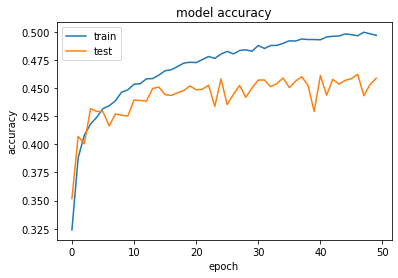

In [7]:
# [Your Work] plot accuracy history of both training and test sets.
plt.plot(h1.history['acc'])
plt.plot(h1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <a id='p1B2'/> งานที่ 1.B.2: อิมพอร์ต plotly พร้อมแสดงเลขเวอร์ชัน
จงรันเซลล์ด้านล่างนี้ สังเกต และจดจำคำสั่งที่ใช้อิมพอร์ต plotly ที่สามารถแสดงผลแบบออฟไลน์ได้ (คือไม่ต้องอาศัยบัญชี plotly และจะไม่เก็บผลลัพธ์ลงบนคลาวด์)

In [8]:
# [Your Work] Import plotly and related sub-modules
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode ,iplot
print(plotly.__version__)

ModuleNotFoundError: No module named 'plotly'

#### <a id='p1B3'/> งานที่ 1.B.3: เชื่อมโน้ตบุ๊คกับ plotly
ลองค้นดูตัวอย่างการใช้ init_notebook_mode จากตัวอย่างในชั้นเรียนหรืออินเตอร์เน็ต เพื่อศึกษาการใช้ฟังก์ชัน init_notebook_mode ในการเชื่อมต่อกับโน้ตบุ๊ค (แนะนำให้ค้นดูตัวอย่างสัปดาห์ที่ 3, 4 ในโน้ตบุ๊คชื่อทำนองนี้ 'Convolution x 2 + Dense 64 + Dropout x 3 + Norm')

In [9]:
# [Your Work]
init_notebook_mode(connected=True)

#### <a id='p1B4'/> งานที่ 1.B.4: เตรียม numpy array สำหรับแกน x
สืบเนื่องจาก plotly นั้นยืดหยุ่นมาก เราจึงต้องระบุด้วยว่าอยากให้ค่าในแกน x ของเรามีอะไรบ้าง ซึ่งในที่นี้เราต้องการให้เป็น 1, 2, 3, ..., 50 เพราะเราฝึกตัวแบบ 50 รอบ

อย่างไรก็ตาม หากเราระบุเลข 50 ลงไปตรง ๆ ตอนสร้างอาเรย์ที่ไล่ค่าขึ้นไปเช่นนั้น เวลาที่เราเปลี่ยนจำนวนรอบการฝึก เราจะต้องมาคอยแก้โค้ดตอนวาดกราฟด้วย ทำให้มีโอกาสผิดพลาดได้ง่าย  เพื่อแก้ปัญหานี้ เราจะสกัดเอาจำนวน epochs ที่ฝึก ด้วยการถามถึงความยาวของลิสต์ที่บันทึกประวัติการฝึก ซึ่งลิสต์นั้นก็คือ h1.history['acc'] แล้วเก็บไว้ในตัวแปรชื่อ num_epochs

จากนั้นเราจะสร้างอาเรย์ที่มีค่าเป็น 1, 2, 3, ..., 50 แล้วเก็บไว้ในตัวแปรชื่อ epochs_x ซึ่งทำได้ด้วยฟังก์ชัน linspace ของโมดูล numpy ซึ่งเรามักจะเขียนว่า np.linspace(1, num_epochs)

In [10]:
# [Your Work]
num_epochs = len(h1.history['acc'])
epochs_x = np.linspace(1, num_epochs)

#### <a id='p1B5'/> งานที่ 1.B.5: ตรวจสอบความถูกต้องของ epochs_x
เมื่อใดก็ตามที่เรากำลังใช้ฟังก์ชันหรือวิธีการที่เราไม่คุ้นเคย เราควรจะระวังตัวเป็นพิเศษ และคอยสังเกตว่าค่าที่อยู่ข้างในตัวแปรสำคัญนั้นตรงตามที่เราคาดหวังไว้หรือไม่ ซี่งในที่นี้เราจะพิมพ์ค่า epochs_x ออกมา

ซึ่งวิธีพิมพ์นั้น ไม่ต้องอาศัยฟังก์ชัน print ก็ได้ แต่ให้อ้างถึงตัวแปรที่เราสนใจตรง ๆ ด้วยการเขียนชื่อมันแล้วรันดูผลลได้เลย

จงเรียกชื่อตัวแปร epochs_x เพื่อแสดงค่าที่อยู่ข้างใน epochs_x ออกมา พร้อมสังเกตด้วยว่ามันมีค่าตรงตามที่เราต้องการจริงหรือไม่ ถ้าตรงจริง มันจะได้ค่าออกมาเป็น 1., 2., ..., 50. ซึ่งแสดงถึง epochs หมายเลข 1 ถึง 50 ที่เราฝึกเครื่องไปนั่นเอง **ขอย้ำอีกครั้งว่าการค่อย ๆ ตรวจสอบความถูกต้องของข้อมูลทีละส่วนอย่างแข็งขันเป็นเรื่องที่สำคัญมากในวิทยาการข้อมูล**

In [11]:
# [Your Work]
print(epochs_x)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


#### <a id='p1B6'/> งานที่ 1.B.6: เซ็ตค่าสำหรับกราฟความแม่นยำ
เช่นเดียวกับ matplotlib เราต้องเซ็ตค่าของกราฟที่เราจะวาดก่อน ซึ่งตัว plotly นั้นจะมีการเซ็ตที่มักจะยาวกว่าของ matplotlib แต่อาจจะดูเป็นระเบียบกว่า เนื่องจากเป็นการเซ็ตค่าของแต่ละเส้นที่ต้องการวาดแยกออกมาเป็นอิสระแต่ละเส้น ในขณะที่ matplotlib จะเน้นไปที่การเซ็ตลงที่ตัว plt โดยตรง

กล่าวคือ plotly จะแยกการเซ็ตกราฟแต่ละเส้นออกมาเตรียมไว้ก่อนในตัวแปรของเส้นกราฟ ซึ่งถ้ามี 10 เส้นก็จะมี 10 ตัวแปร แล้วจึงนำเส้นกราฟไปรวมกันตอนวาด แต่ matplotlib จะเน้นที่การเซ็ตค่าลงในกราฟโดยตรง  วิธีของ plotly จะทำให้การวาดกราฟที่ซับซ้อนดูมีระเบียบขึ้น และสามารถนำเส้นกราฟอันเดียวไปใช้อีกรอบในกราฟอื่น ๆ ได้ง่ายเนื่องจากเป็นตัวแปรที่แยกอิสระต่อกัน

จงเซ็ตค่าเส้นกราฟความแม่นยำของชุดข้อมูลฝึกโดยตั้งชื่อเส้นว่า train และใช้โหมด 'lines_markers' และเก็บการเซ็ตกราฟเส้นนี้ไว้ในตัวแปร train_acc_trace1  จากนั้นให้ทำแบบเดียวกันกับเส้นกราฟความแม่นยำของชุดข้อมูลทดสอบ แต่ให้ใช้ชื่อเส้นว่า test และเก็บไว้ในตัวแปร test_acc_trace1

In [12]:
# [ํYour Work]
train_acc_trace1 = go.Scatter(
    x = epochs_x,
    y = h1.history['acc'],
    mode = 'lines+markers',
    name = 'train'
)

test_acc_trace1 = go.Scatter(
    x = epochs_x,
    y = h1.history['val_acc'],
    mode = 'lines+markers',
    name = 'test'
)
#fig = dict(data=[train_acc_trace1,test_acc_trace1])

#### <a id='p1B6'/> งานที่ 1.B.6: แพ็คเส้นกราฟเข้าด้วยกันในลิสต์แล้ววาดออกมา
หลังจากที่เตรียมการอยู่นาน ในตอนนี้เราพร้อมแล้ว ซึ่งแนวปฏิบัติของ plotly เราจะสร้างลิสต์ที่เก็บเส้นกราฟทั้งหมดไว้ด้วยกัน จากนั้นเราจะเรียกฟังก์ชัน iplot ที่เราอิมพอร์ตเข้ามาบนลิสต์ดังกล่าว  แม้ว่าเราจะสามารถสร้างลิสต์ขึ้นมาในขณะที่ส่งมันไปเป็นพารามิเตอร์ของ iplot ได้เลย แต่ในแบบฝึกหัดนี้ เราจะพักการสร้างลิสต์ลงในตัวแปรก่อน จากนั้นจึงส่งตัวแปรนั้นไปที่ iplot

จงสร้างลิสต์ที่ข้างในมี train_acc_trace1 และ test_acc_trace1 แล้วเก็บลิสต์นี้ไว้ในตัวแปรชื่อ acc_data1 จากนั้นให้ส่ง acc_data1 ไปเป็นพารามิเตอร์ของ iplot

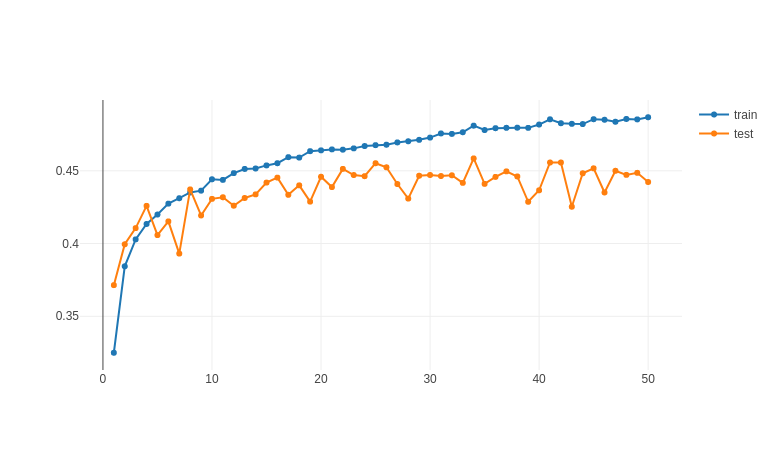

In [13]:
# [ํYour Work]
acc_data1 = [train_acc_trace1, test_acc_trace1]
plotly.offline.iplot(acc_data1)

#### <a id='p1B7'/> งานที่ 1.B.7: ลดบรรทัดลง สร้างลิสต์ตรงวงเล็บของ iplot แล้วส่งเป็นพารามิเตอร์ทันที
ในโค้ดส่วนที่แล้ว เราสร้างลิสต์แล้วพักลงตัวแปรก่อน ทำให้โค้ดมีสองบรรทัด แต่ที่จริงเราสามารถยุบรวมให้เหลือบรรทัดเดียวได้ โดยการสร้างลิสต์ในวงเล็บสำหรับการส่งพารามิเตอร์ 

จงพล็อตกราฟเดิม โดยการสร้างลิสต์ในวงเล็บสำหรับการส่งพารามิเตอร์ (อย่าสร้างตัวแปรขึ้นมา ให้สร้างลิสต์ไว้ในวงเล็บของ iplot โดยตรง) โค้ดของคุณควรจะมีเพียงบรรทัดเดียวและไม่มีการอ้างถึง acc_data1 แต่อย่างใด ซึ่งโค้ดคุณจะอยู่ในรูป iplot( ... ) ทำนองนี้

**หมายเหตุ** ปรกติแล้ว สำหรับลิสต์ใดที่เราจะใช้ครั้งเดียวแล้วไม่ใช้อีก เรามักจะใช้วิธีสร้างและใช้ทันทีในบรรทัดเดียวกันแบบงานนี้ เพื่อให้ได้โค้ดที่กระชับและไม่มีตัวแปรมากมายให้เครื่องต้องเก็บไว้ในหน่วยความจำมากกว่าที่จำเป็น

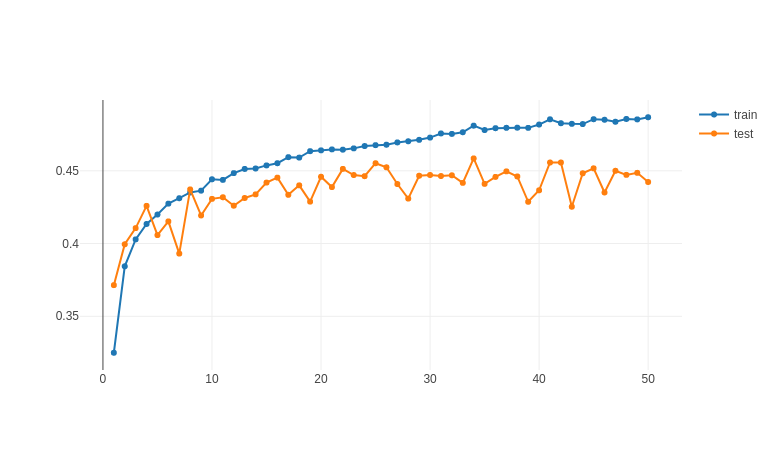

In [14]:
# [ํYour Work]
plotly.offline.iplot([train_acc_trace1, test_acc_trace1])

### <a id='p1C'/> งานที่ 1.C: เพิ่มจำนวนโหนดในชั้นซ่อนตัว
เราจะทดลองเพิ่มจำนวนโหนดในชั้นซ่อนตัวให้เป็น 500 และเลือกอันที่มีความแม่นยำสูงกว่า (ระหว่างแบบ 200 กับ 500 โหนด) มาให้เป็น baseline  ซึ่งคำว่ามีความแม่นยำสูงกว่านี้ควรมาจากความแม่นยำใน test set ไม่อย่างนั้นแล้วตัวแบบที่มี 'ความจุ' ด้านความจำสูงกว่าจะมีแนวโน้มเป็นฝ่ายชนะใน training set เกือบทุกครั้ง แม้ว่าจะมีประโยชน์น้อยกว่าในทางปฏิบัติก็ตาม

#### <a id='p1C1'/> งานที่ 1.C.1: ปรับตัวแบบให้มีโหนดในชั้นซ่อนตัว 500 โหนด
จงนำตัวแบบจากข้อ 1.1 มาเพิ่มจำนวนโหนดในชั้นซ่อนตัวให้มี 500 โหนด

In [15]:
# [Your Work] Create a model here
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### <a id='p1C2'/> งานที่ 1.C.2: คอมไพล์ตัวแบบและพิมพ์ summary
จงนำตัวแบบที่สร้างใหม่มาคอมไพล์และสั่งพิมพ์สรุปด้วยฟังก์ชัน summary()

In [16]:
# [Your Work] (Just run this one)
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 1,541,510
Trainable params: 1,541,510
Non-trainable params: 0
_________________________________________________________________


#### <a id='p1C3'/> งานที่ 1.C.3: ฝึกตัวแบบอันใหม่
เอาล่ะ มาลองฝึกโมเดลด้วยคำสั่ง fit กันอีกรอบ จะได้เห็นว่าการเพิ่มจำนวนโหนดในชั้นซ่อนตัวเช่นนี้จะช่วยให้เราได้ตัวแบบที่ดีขึ้นหรือไม่

In [17]:
# [Your Work] fit a model with train images and labels for 50 epochs
h2 = model.fit(train_images, train_labels, epochs=50 , validation_data=(test_images,test_labels), batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 315us/sample - loss: 1.8932 - acc: 0.3307 - val_loss: 1.7657 - val_acc: 0.3719
Epoch 2/50
50000/50000 [==============================] - 15s 308us/sample - loss: 1.6947 - acc: 0.3923 - val_loss: 1.7092 - val_acc: 0.3938
Epoch 3/50
50000/50000 [==============================] - 15s 301us/sample - loss: 1.6260 - acc: 0.4185 - val_loss: 1.6075 - val_acc: 0.4229
Epoch 4/50
50000/50000 [==============================] - 15s 297us/sample - loss: 1.5878 - acc: 0.4329 - val_loss: 1.5722 - val_acc: 0.4460
Epoch 5/50
50000/50000 [==============================] - 14s 289us/sample - loss: 1.5579 - acc: 0.4463 - val_loss: 1.5786 - val_acc: 0.4422
Epoch 6/50
50000/50000 [==============================] - 15s 302us/sample - loss: 1.5320 - acc: 0.4545 - val_loss: 1.5540 - val_acc: 0.4466
Epoch 7/50
50000/50000 [==============================] - 15s 301us/sample - loss: 1.5215 - acc: 0.4578 

#### <a id='p1C4'/> งานที่ 1.C.4: สั่งบันทึกตัวแบบ
ให้ใช้เซลล์ด้านล่างนี้เพื่อบันทึกตัวแบบลงในไฟล์ชื่อ 'trained_model_hw3-1_2.hdf5'

In [18]:
# [Your Work]
model.save('trained_model_hw3-1_2.hdf5')

### <a id='p1D'/> งานที่ 1.D: เปรียบเทียบสมรรถนะของตัวแบบด้วย plotly
เรามีประวัติการฝึกและทดสอบตัวแบบด้วย test set ในตัวแปร h1 และ h2 แล้ว เราสามารถนำข้อมูลทั้งสองชุดมาวาดลงในกราฟเดียวกันเพื่อให้ง่ายต่อการเปรียบเทียบแบบ side-by-side ได้  วิธีนี้เป็นที่นิยมในงานวิจัยที่เราต้องการเปรียบเทียบว่าตัวแบบสองตัว (หรือมากกว่านั้นก็ได้) มีความแม่นยำแตกต่างกันเพียงใด 

#### <a id='p1D1'/> งานที่ 1.D.1: สร้างตัวแปรเก็บข้อมูลการฝึกโมเดลจาก h2
ก่อนหน้านี้เรามีข้อมูลกราฟของ h1 ในตัวแปรชื่อ train_acc_trace1 และ test_acc_trace1 แล้ว เราจะทำแบบเดียวกันกับการเก็บข้อมูลกราฟของ h2 เพียงแต่เปลี่ยนชื่อเป็นชื่อ train_acc_trace2 และ test_acc_trace2 และเปลี่ยนชื่อ (name) ของเส้นกราฟเป็น train 2 และ test 2 ด้วย

In [19]:
# [ํYour Work]
# [ํYour Work]
train_acc_trace2 = go.Scatter(
    x = epochs_x,
    y = h2.history['acc'],
    mode = 'lines+markers',
    name = 'train2'
)

test_acc_trace2 = go.Scatter(
    x = epochs_x,
    y = h2.history['val_acc'],
    mode = 'lines+markers',
    name = 'test2'
)
#fig = dict(data=[train_acc_trace1,test_acc_trace1])

#### <a id='p1D2'/> งานที่ 1.D.2 พล็อตกราฟ 4 เส้นจากสองตัวแบบในผังเดียวกัน
ในกรณีนี้ เราอยากเทียบสมรรถนะของตัวแบบทั้งสองควบคู่กันไปทั้งในตอนฝึกและตอนทดสอบ ดังนั้นเราจะพล็อต train_acc_trace1, train_acc_trace2, test_acc_trace1, test_acc_trace2 ไว้ด้วยกันในผังเดียว

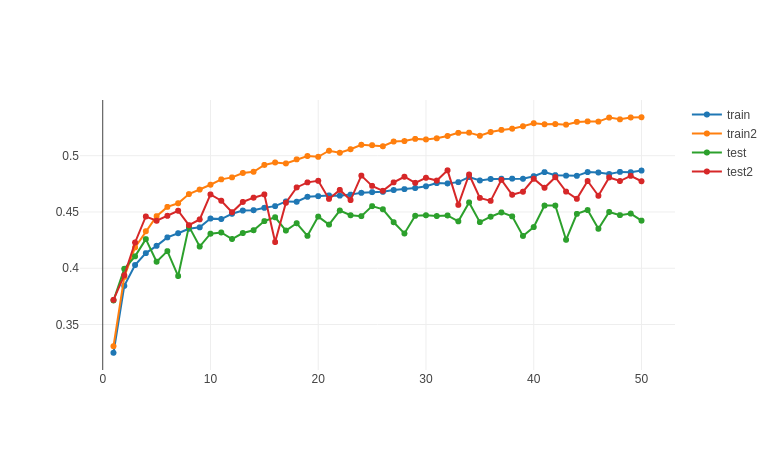

In [20]:
# [Your Work]
iplot([train_acc_trace1, train_acc_trace2, test_acc_trace1, test_acc_trace2])

### <a id='q1D'/> Quick Quiz 1.D: สมรรถนะของการฝึกและทดสอบในตัวแบบ
มีประเด็นที่เราควรสังเกตและตอบออกมาทางพื้นที่ด้านล่างดังนี้
1. ในตอนฝึกตัวแบบที่สองซึ่งมีโหนดมากกว่ามีแนวโน้มทำได้ดีกว่าตัวแบบแรกอย่างคงเส้นคงวาหรือไม่
2. ในตอนทดสอบตัวแบบที่สองมีแนวโน้มทำได้ดีกว่าตัวแบบแรกอย่างคงเส้นคงวาหรือไม่
3. คำตอบในข้อ 1 และ 2 ขัดกันหรือสอดคล้องกัน จงให้เหตุผลสนับสนุนว่าทำไมจึงเป็นเช่นนั้น

(พื้นที่สำหรับเติมคำตอบ ดับเบิลคลิกเพื่อเติมคำตอบเช่นเดียวกับการบ้านที่แล้ว)


## <a id='p2'/> งานที่ 2: การใช้โครงข่ายคอนโวลูชัน
แม้เราจะเพิ่มจำนวนโหนดในชั้นซ่อนตัว (hidden layer) ไปแล้ว แต่ความแม่นยำที่ได้ก็ใช่ว่าจะดูดี นั่นอาจเป็นเพราะเราเลือกใช้ชั้นแบบเชื่อมต่อทั้งหมด (fully connected layer หรือ dense layer) ในขณะที่ชั้นแบบคอนโวลูชัน (convolutional layer) อาจจะให้ผลดีที่ดีกว่าเพราะมีความสอดคล้องกับประสาทด้านการมองเห็นของมนุษย์มากกว่า ดังนั้นเราจะมาลองใช้ตัวแบบที่มีชั้นคอนโวลูชันเพื่อศึกษาสมรรถนะของมัน

แบบชั้นเดียว
แบบสองชั้น
ทดลองเปลี่ยนจำนวน feature maps เพื่อสังเกตความเปลี่ยนแปลงเรื่องความแม่นยำ
ทดลองเปลี่ยนจำนวนภาพในกลุ่มย่อยเพื่อสังเกตความเปลี่ยนแปลงเรื่องความแม่นยำและเวลาที่ใช้ในการฝึก

### <a id='p2A'/> งานที่ 2.A: การสร้างชั้นคอนโวลูชันแบบพื้นฐาน
สิ่งที่สำคัญมากในการใช้ชั้นคอนโวลูชันคือการเลือกขนาดของตัวกรอง (filter) และจำนวนฟีทเจอร์แม็พ ซึ่งในที่นี้เราจะเลือกใช้ตัวกรองขนาดเล็กคือ 3x3 และมีจำนวนฟีทเจอร์แม็พ 16 อัน ส่วนฟังก์ชันแอ็คติเวชันยังคงเลือกใช้ relu เช่นเดิม ซึ่งการใช้ชั้นคอนโวลูชันนี้ เรามักจะไม่ใช้เป็นชั้นสุดท้ายที่ให้ผลลัพธ์ แต่เราจะนำชั้นแบบ Dense ที่มีจำนวนโหนดเท่ากับจำนวนคลาสมาเป็นชั้นผลลัพธ์แทน 

อย่างไรก็ตาม เราไม่สามารถเชื่อมชั้นคอนโวลูชันเข้ากับชั้นแบบ Dense ได้โดยตรง เราจะเอาชั้นแบบ Flatten มาคั่นก่อน กล่าวคือ
1. ตัวแบบของเรามีชั้นแรกเป็นแบบ Conv2D, มี activation เป็น relu, มี input_shape เป็น (32, 32, 3), มีขนาดฟิลเตอร์เป็น (3, 3) และมีจำนวนฟีทเจอร์แม็พเป็น 16
2. ชั้นที่สองเป็นชั้นปรับรูปร่างให้เป็นเวคเตอร์เดี่ยว (Flatten)
3. ชั้นผลลัพธ์ (ชั้นที่สาม) เป็นแบบ Dense มี 10 โหนด และใช้ softmax (หยิบของเดิมมาใช้ได้)

In [21]:
# [Your Work] 
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

ต่อด้วยการคอมไพล์และพิมพ์สรุปทันทีเช่นเดิม

In [22]:
# [Your Work] 
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                144010    
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
_________________________________________________________________


คราวนี้เราจะฝึกตัวแบบแล้ว แต่เพื่อความรวดเร็วเราจะฝึกเพียงแค่ 20 epoch และเพื่อให้ง่ายต่อการเก็บผลลัพธ์มาเปรียบเทียบ เราจะเก็บประวัติการฝึกไว้ในตัวแปร h3

In [23]:
# [Your Work] fit a model with train images and labels for 20 epochs
h3 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 231us/sample - loss: 1.5176 - acc: 0.4669 - val_loss: 1.3718 - val_acc: 0.5174
Epoch 2/20
50000/50000 [==============================] - 10s 196us/sample - loss: 1.2445 - acc: 0.5699 - val_loss: 1.2777 - val_acc: 0.5454
Epoch 3/20
50000/50000 [==============================] - 10s 200us/sample - loss: 1.1518 - acc: 0.6011 - val_loss: 1.2452 - val_acc: 0.5685
Epoch 4/20
50000/50000 [==============================] - 9s 183us/sample - loss: 1.0866 - acc: 0.6229 - val_loss: 1.2219 - val_acc: 0.5766
Epoch 5/20
50000/50000 [==============================] - 9s 181us/sample - loss: 1.0335 - acc: 0.6443 - val_loss: 1.2478 - val_acc: 0.5725
Epoch 6/20
50000/50000 [==============================] - 9s 189us/sample - loss: 0.9828 - acc: 0.6616 - val_loss: 1.2692 - val_acc: 0.5653
Epoch 7/20
50000/50000 [==============================] - 9s 186us/sample - loss: 0.9502 - acc: 0.6712 - va

### <a id='p2B'/> งานที่ 2.B: สร้างตัวแบบที่มีการย่อรูปและซ้อนชั้นคอนโวลูชัน
เนื่องจากสายตาของมนุษย์มีการพิจารณาภาพทั้งในระดับหยาบและละเอียด ซึ่งข้อมูลในทั้งสองระดับอาจจะมีความสำคัญทั้งคู่สำหรับการจำแนกวัตถุ ทำให้เราจะย่อฟีทเจอร์แม็พจากการทำคอนโวลูชันในชั้นแรกก่อนด้วยการทำ Max Pooling แล้วจึงเรียกใช้ชั้นคอนโวลูชันอีกอัน นอกจากนี้เราจะทดสอบการใช้พารามิเตอร์ padding='same' ในชั้นคอนโวลูชันอันแรกด้วย

สรุปแล้วโครงสร้างของตัวแบบที่เราต้องการคือ
1. ตัวแบบของเรามีชั้นแรกยังเหมือนเดิม **เพิ่มเติมคือพารามิเตอร์ padding='same'**
2. ชั้นที่สองเป็นชั้น keras.layers.MaxPooling2D (ใช้พารามิเตอร์แบบดีฟอลต์ได้ คือใช้วงเล็บเปล่าในการระบุพารามิเตอร์)
3. ชั้นที่สามเป็นชั้นคอนโวลูชัน กำหนดให้พารามิเตอร์เหมือนชั้นแรก ยกเว้นจำนวนฟีทเจอร์แม็พให้เพิ่มเป็น 32 อัน ใช้ padding='same' เช่นกัน
4. ชั้นที่สี่เป็นชั้นปรับรูปร่างให้เป็นเวคเตอร์เดี่ยว (Flatten)
3. ชั้นผลลัพธ์ (ชั้นที่ห้า) เป็นแบบ Dense มี 10 โหนด และใช้ softmax (หยิบของเดิมมาใช้ได้)

**หมายเหตุ 1** เราไม่จำเป็นต้องคั่นชั้นคอนโวลูชันด้วยการย่อรูปเสมอไป การซ้อนชั้นคอนโวลูชันแบบติดกันไป แท้จริงถือเป็นเรื่องปรกติ (พบบ่อยในโครงสร้างที่ซับซ้อนขึ้นเช่น ResNet หรือ U-Net) <br/>
**หมายเหตุ 2** เรามักจะเพิ่มหรือคงค่าจำนวนฟีทเจอร์แม็พในชั้นลึก ๆ เพราะทรัพยากรการคำนวณเรามีมากพอที่จะจำข้อมูลที่ระดับหยาบได้ นอกจากนี้การคำนวณลงไปในระดับที่หยาบขึ้น เครื่องมักจะสรุปข้อมูลออกมาได้หลากหลาย การเตรียมที่เก็บข้อมูลไว้เท่าเดิมหรือมากขึ้นจึงสัมพันธ์กันดีทั้งในแง่ของทรัพยากรการคำนวณที่ทำได้และความหลากหลายของข้อมูลที่ต้องบันทึก

In [24]:
# [Your Work] ระบุโครงสร้างโมเดลที่เหมาะสมและสอดคล้องกับข้อกำหนด อย่าลืม padding='same'
# [Your Work] 
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

เราจะยังคอมไพล์โมเดลและพิมพ์สรุปโครงสร้างออกมาเช่นเดิม

In [25]:
# [Your Work] คอมไพล์และพิมพ์สรุปโมเดล
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                81930     
Total params: 87,018
Trainable params: 87,018
Non-trainable params: 0
_________________________________________________________________


ฝึกตัวแบบ 20 epochs และเก็บประวัติการฝึกไว้ในตัวแปร h4 เพื่อเตรียมเปรียบเทียบความแม่นยำจากแต่ละตัวแบบ

In [26]:
# [Your Work] fit a model with train images and labels for 20 epochs
h4 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 221us/sample - loss: 1.4388 - acc: 0.4912 - val_loss: 1.1947 - val_acc: 0.5820
Epoch 2/20
50000/50000 [==============================] - 11s 216us/sample - loss: 1.1223 - acc: 0.6080 - val_loss: 1.0543 - val_acc: 0.6305
Epoch 3/20
50000/50000 [==============================] - 11s 226us/sample - loss: 0.9963 - acc: 0.6548 - val_loss: 1.0410 - val_acc: 0.6423
Epoch 4/20
50000/50000 [==============================] - 12s 231us/sample - loss: 0.9136 - acc: 0.6828 - val_loss: 1.0084 - val_acc: 0.6455
Epoch 5/20
50000/50000 [==============================] - 11s 218us/sample - loss: 0.8509 - acc: 0.7041 - val_loss: 0.9667 - val_acc: 0.6680
Epoch 6/20
50000/50000 [==============================] - 11s 220us/sample - loss: 0.7950 - acc: 0.7259 - val_loss: 1.0282 - val_acc: 0.6487
Epoch 7/20
50000/50000 [==============================] - 12s 238us/sample - loss: 0.7461 - acc: 0.7424 

#### <a id='p2B2'/> งานที่ 2.B.2: พล็อตกราฟเปรียบเทียบสมรรถนะตัวแบบทั้ง 4
ตอนนี้เรามีตัวแบบ 4 ตัว เราอยากพล็อตกราฟร่วมกัน ติดแต่ตรงที่ว่าจำนวน epochs ที่ฝึกใช่จะเท่ากัน โดยสองตัวแรก เราฝึกไป 50 epochs แต่สองอันหลังเราฝึกไปเพียง 20 epochs เท่านั้น ทำให้เราต้องเตรียมข้อมูลสำหรับแกน x ใหม่ (แกน x แสดงจำนวน epoch จึงต้องเพิ่มตัวแปรนี้) การเตรียมข้อมูลแกน x นี้ยังใช้ np.linspace เหมือนเดิม โดยเราจะสร้างตัวแปร num_epochs2 จากความยาวของ h3.history['acc'] และตัวแปรที่เก็บจำนวน epochs เราจะเก็บไว้ในตัวแปร epochs_x2

จุดที่ต้องการให้เน้นก็คือ เราต้อง print(epochs_x2) ออกมาดูด้วย ถ้าถูกต้อง จะได้ผลเป็น [1 2 3 ... 20] เพราะมี 20 epochs (ถ้าทำมาแล้วไม่ถูก อ่านข้อความข้างล่างเพิ่มเติม)

In [27]:
# [Your Work]
num_epochs2 = len(h3.history['acc'])
epochs_x2 = np.linspace(1, num_epochs2, 20)
print(epochs_x2)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


ตรวจดูจากข้างบนก่อนว่ามันเป็น [1 2 3 ... 20] คือมีเฉพาะจำนวนเต็มหรือเปล่า ถ้าไม่เป็นเช่นนั้นแสดงยังทำไม่ถูก 
ขอให้ทดลองใส่พารามิเตอร์ตัวที่สามเข้าไปใน np.linspace ทำให้คำสั่งมีหน้าตาคล้าย ๆ นี้ <br/>
epochs_x2 = np.linspace(1, num_epochs2, 20)

สาเหตุที่ต้องใส่เลข 20 เข้าไปก็เพราะว่า linspace โดยปรกติจะสร้างค่าลงในอาเรย์ทั้งหมด 50 ค่า (ถ้าเราไม่บอกอะไร) 
ซึ่งก่อนหน้าเราฝึกตัวแบบ 50 epochs พอดีทำให้เราไม่ต้องระบุจำนวนลงไป แต่ในคราวนี้เราฝึกแค่ 20 จึงต้องระบุเพิ่มเข้าไปด้วย

เอาล่ะ มาเตรียมข้อมูลผลการฝึกจาก h3 และ h4 กัน เราจะทำคล้าย ๆ เดิมกับ h1 และ h2 ที่สำคัญคืออย่าลืมเปลี่ยนชื่อและตัวแปรต่าง ๆ 
และต้องกำหนดค่าในเส้นกราฟว่า <br/> **x = epochs_x2**

In [28]:
# [ํYour Work]
train_acc_trace3 = go.Scatter(
    x = epochs_x2,
    y = h3.history['acc'],
    mode = 'lines+markers',
    name = 'train3'
)

test_acc_trace3 = go.Scatter(
    x = epochs_x2,
    y = h3.history['val_acc'],
    mode = 'lines+markers',
    name = 'test3'
)

train_acc_trace4 = go.Scatter(
    x = epochs_x2,
    y = h4.history['acc'],
    mode = 'lines+markers',
    name = 'tran4'
)

test_acc_trace4 = go.Scatter(
    x = epochs_x2,
    y = h4.history['val_acc'],
    mode = 'lines+markers',
    name = 'test4'
)

**พล็อตกราฟ 4 ชุด 8 เส้นไว้ด้วยกัน** คราวนี้ก็มาถึงคราวใช้ iplot วาดกราฟทั้งหมดไว้ด้วยกันเพื่อเปรียบเทียบสมรรถนะ

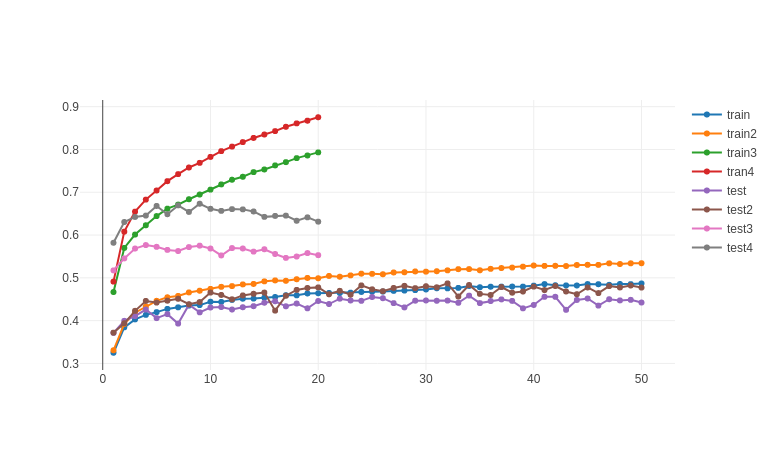

In [29]:
# [Your Work]
iplot([train_acc_trace1, train_acc_trace2,train_acc_trace3, train_acc_trace4,
       test_acc_trace1, test_acc_trace2,  test_acc_trace3, test_acc_trace4 ])

### <a id='q2B'/> Quick Quiz 2.B: อะไรคือเบื้องหลังความสำเร็จของตัวแบบ โมเดลที่ใหญ่มีพารามิเตอร์มากได้เปรียบหรือไม่
หากเราอยากต้องคำถามในหัวข้อของควิซนี้ เราต้องลองสำรวจตัวแบบของเราจากคำสั่ง summmary ที่เรารันมาตลอดเสียก่อน

ถึงจุดนี้ บางคนอาจจะสงสัยว่าทำไมแบบฝึกหัดบอกให้พิมพ์ของพวกนี้ออกมาบ่อยนัก แน่นอนว่าเหตุผลนั้นมีอยู่หลายประการ ขอสรุปให้ฟังอีครั้งคร่าว ๆ ดังนี้
1. เราควรตรวจสอบดูอีกทางว่าตัวแบบของเรามีโครงสร้างที่สัมพันธ์กับสิ่งที่เราต้องการจริงหรือไม่
2. ในขณะที่เราฝึกตัวแบบ หากมีข้อผิดพลาดประการใด ระบบจะแจ้งเตือนกลับมาโดยอ้างถึงชื่อของชั้นที่มีปัญหา ซึ่งชื่อดังกล่าวปรากฏอยู่ใน model summary
3. การสังเกตจำนวนพารามิเตอร์ทำให้เรารู้ว่าตัวแบบของเราจะใช้หน่วยความจำมากน้อยเพียงใด

ซึ่งครั้งนี้อยากให้สังเกตเป็นพิเศษเพื่อเปรียบเทียบความสัมพันธ์ระหว่างความแม่นยำและจำนวนพารามิเตอร์ในตัวแบบ เนื่องจากหลายครั้ง เรามักจะพยายามทำโมเดลให้ใหญ่ ให้ซับซ้อนขึ้น และหวังว่ามันจะมีพลังพอที่จะช่วยแก้ปัญหาของเราได้ดีขึ้นกว่าเดิม

เราจะมาวิเคราะห์ประเด็นเรื่องตัวแบบที่ใหญ่ผ่านพารามิเตอร์ในตัวแบบกันเสียก่อน <br/>
**คำถามข้อแรก** พารามิเตอร์ในตัวแบบทั้ง 4 มีค่าเท่าใดบ้าง ให้ตอบแบบเรียงลำดับจาก**มากไปน้อย**

(พื้นที่สำหรับเติมคำตอบ) <br/><br/>
2 1541510  <br/>
1 616610  <br/>
3 144458  <br/>
4 87018 

**คำถามข้อสอง** ค่าความแม่นยำของตัวแบบทั้ง 4 ในชุดข้อมูลฝึก (training set) มีค่าเท่าใดบ้าง เรียงตามลำดับความแม่นยำในชุดข้อมูลนี้จาก**มากไปน้อย** (สามารถใช้ค่าความแม่นยำใน epoch สุดท้ายมาตอบ หรือความแม่นยำสูงสุดที่ตัวแบบแต่ละตัวทำได้มาตอบคำถามนี้ และคำถามอื่น ๆ ที่เกี่ยวข้อง)

**สาระน่ารู้** ถ้าเส้นกราฟมีมากจนทำให้เราศึกษาเส้นที่เราสนใจลำบาก เราสามารถคลิกไปที่คำอธิบายสัญลักษณ์ (legend) ทางด้านข้างของกราฟเพื่อเลือกสลับการเปิดปิดการแสดงเส้นกราฟแต่ละเส้นได้

(พื้นที่สำหรับเติมคำตอบ) <br/><br/>
4 0.8753 <br/>
3 0.7932 <br/>
2 0.5342 <br/>
1 0.4868

**คำถามข้อสาม** ค่าความแม่นยำของตัวแบบทั้ง 4 ในชุดข้อมูลทดสอบ (test set) มีค่าเท่าใดบ้าง เรียงตามลำดับความแม่นยำในชุดข้อมูลนี้จาก**มากไปน้อย**

(พื้นที่สำหรับเติมคำตอบ) <br/><br/>
4 0.6313 <br/>
3 0.5530 <br/>
2 0.4773 <br/>
1 0.4423


**คำถามข้อสี่** ลำดับความแม่นยำของตัวแบบทั้ง 4 ในชุดข้อมูลฝึกและทดสอบเหมือนกันหรือไม่ จงอภิปรายเหตุผลสำหรับข้อสังเกตที่ได้ในประเด็นนี้

(พื้นที่สำหรับเติมคำตอบ) <br/><br/>
เหมือนกัน เพราะใช้modelเดียวกัน 

**คำถามข้อห้า** ลำดับตามจำนวนพารามิเตอร์ของตัวแบบทั้ง 4 กับลำดับตามความแม่นยำในชุดข้อมูลทดสอบเหมือนกันหรือไม่ จงอภิปรายเหตุผลสำหรับข้อสังเกตที่ได้ในประเด็นนี้

(พื้นที่สำหรับเติมคำตอบ) <br/><br/>
ไม่เหมือนกัน เพราะparem เยอะทำให้สับสน

**คำถามข้อหก** สรุปแล้วตัวแบบที่ใหญ่มีพารามิเตอร์มากทำให้ได้เปรียบเรื่องความแม่นยำหรือไม่ ถ้าไม่ใช่คุณคิดว่าตัวแบบที่มีพารามิเตอร์น้อยกว่าจะได้เปรียบหรือเปล่า และคุณคิดว่าปัจจัยหลักที่จะทำให้ตัวแบบประสบความสำเร็จในเรื่องของความแม่นยำคืออะไร

(พื้นที่สำหรับเติมคำตอบ) <br/><br/>
ตัวแบบที่ใหญ่มีพารามิเตอร์มากทำให้ได้เปรียบเรื่องความแม่นยำหรือไม่ ไม่ๆ  <br/>
ตัวแบบที่มีพารามิเตอร์น้อยกว่าจะได้เปรียบหรือเปล่า ไม่ๆ <br/>
ปัจจัยหลักที่จะทำให้ตัวแบบประสบความสำเร็จในเรื่องของความแม่นยำคืออะไร การลองผิดลองถูก

### <a id='p2C'/> งานที่ 2.C: ทดลองเปลี่ยนจำนวนฟีทเจอร์แม็พ
จำนวนฟีทเจอร์แม็พเป็นหนึ่งในประเด็นที่สำคัญในตัวแบบคอนโวลูชัน เราจะมาลองปรับจำนวนฟีทเจอร์แม็พในตัวแบบล่าสุด (โมเดลอันที่ 4) เพื่อศึกษาผลกระทบของจำนวนฟีทเจอร์แม็พต่อความแม่นยำของตัวแบบ

### <a id='p2C1'/> งานที่ 2.C.1: ปรับตัวแบบที่ 4 ให้มีจำนวนฟีทเจอร์แม็พน้อยลง
ขั้นคอนโวลูชันอันแรกให้มี 8 แม็พ ส่วนชั้นที่สองให้มี 16 แม็พ เพื่อความกระชับให้นิยามโครงสร้างแล้วคอมไพล์พร้อมพิมพ์ summary ในเซลล์เดียวกันได้เลย (แต่โดยปรกติเราจะยังทำการฝึกในเซลล์แยก เพราะถ้าเริ่มฝึกในตัวแบบที่ผิดไปแล้ว เราอาจจะหยุดมันได้ยาก เว้นเสียจะสั่งปิดเคอร์เนลล้างค่าตัวแปรทักอย่างทิ้งไป

In [30]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(8, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                40970     
Total params: 42,362
Trainable params: 42,362
Non-trainable params: 0
_________________________________________________________________


ฝึกตัวแบบ 20 epochs และเก็บประวัติการฝึกไว้ใน h5

In [33]:
# [Your Work] fit a model with train images and labels for 20 epochs
h5 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 186us/sample - loss: 1.5556 - acc: 0.4460 - val_loss: 1.3333 - val_acc: 0.5289
Epoch 2/20
50000/50000 [==============================] - 9s 181us/sample - loss: 1.2799 - acc: 0.5481 - val_loss: 1.2280 - val_acc: 0.5648
Epoch 3/20
50000/50000 [==============================] - 9s 181us/sample - loss: 1.1670 - acc: 0.5927 - val_loss: 1.1610 - val_acc: 0.5923
Epoch 4/20
50000/50000 [==============================] - 9s 179us/sample - loss: 1.0847 - acc: 0.6213 - val_loss: 1.1390 - val_acc: 0.5995
Epoch 5/20
50000/50000 [==============================] - 9s 180us/sample - loss: 1.0273 - acc: 0.6426 - val_loss: 1.0967 - val_acc: 0.6189
Epoch 6/20
50000/50000 [==============================] - 9s 182us/sample - loss: 0.9848 - acc: 0.6575 - val_loss: 1.0850 - val_acc: 0.6259
Epoch 7/20
50000/50000 [==============================] - 9s 179us/sample - loss: 0.9439 - acc: 0.6733 - val_l

### <a id='p2C2'/> งานที่ 2.C.2: ปรับตัวแบบที่ 4 ให้มีจำนวนฟีทเจอร์แม็พที่มากขึ้น
คราวนี้เราจะลองปรับตัวแบบที่ 4 ให้มีจำนวนฟีทเจอร์แม็พเพิ่มขึ้นเท่าตัวเป็น 32 และ 64 แม็พในชั้นคอนโวลูชันที่ 1 และ 2 <br/>
เช่นเดิมกับงานที่แล้ว เราจะนิยามโครงสร้าง คอมไพล์และพิมพ์สรุปข้อมูลตัวแบบในเซลล์เดียวกัน

In [34]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                163850    
Total params: 183,242
Trainable params: 183,242
Non-trainable params: 0
_________________________________________________________________


ฝึกตัวแบบ 20 epochs และเก็บประวัติการฝึกไว้ใน h6

In [35]:
# [Your Work] fit a model with train images and labels for 20 epochs
h6 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 17s 336us/sample - loss: 1.3560 - acc: 0.5206 - val_loss: 1.1200 - val_acc: 0.6022
Epoch 2/20
50000/50000 [==============================] - 16s 330us/sample - loss: 1.0110 - acc: 0.6487 - val_loss: 0.9784 - val_acc: 0.6596
Epoch 3/20
50000/50000 [==============================] - 16s 330us/sample - loss: 0.8777 - acc: 0.6946 - val_loss: 0.9328 - val_acc: 0.6806
Epoch 4/20
50000/50000 [==============================] - 16s 327us/sample - loss: 0.7860 - acc: 0.7264 - val_loss: 0.9187 - val_acc: 0.6891
Epoch 5/20
50000/50000 [==============================] - 16s 330us/sample - loss: 0.7064 - acc: 0.7542 - val_loss: 0.9438 - val_acc: 0.6818
Epoch 6/20
50000/50000 [==============================] - 16s 330us/sample - loss: 0.6348 - acc: 0.7812 - val_loss: 0.9398 - val_acc: 0.6884
Epoch 7/20
50000/50000 [==============================] - 17s 332us/sample - loss: 0.5696 - acc: 0.8029 

#### <a id='p2C3'/> งานที่ 2.C.3: อ่านค่าความแม่นยำสูงสุดที่ตัวแบบทำได้
เนื่องจากตัวแบบที่มีปัญหาโอเวอร์ฟิตอาจจะเทรนไปมาก ๆ แล้วมีความแม่นยำน้อยลง ทำให้ epochs ด้านท้าย ๆ ไม่ได้ให้ผลลัพธ์ที่ใกล้เคียงกับผลลัพธ์ที่ดีที่สุดที่มันทำได้ ดังนั้นจึงเป็นเรื่องดีที่เราจะหาค่าความแม่นยำของตัวแบบใน epoch ที่มันมีความแม่นยำในชุดข้อมูลทดสอบที่ดีที่สุด ซึ่งเราจะค้นหาค่าสูงสุดจาก h4.history['val_acc'] และทำแบบเดียวกันกับ h5, h6 และตรวจดูว่าสามตัวแบบนี้ให้ความแม่นยำที่ดีที่สุดกี่เปอร์เซ็นต์

จงใช้คำสั่ง max ในโมดูล numpy เพื่อหาค่าความแม่นยำสูงสุดในชุดข้อมูลทดสอบจากประวัติการฝึกของตัวแบบที่ 4 และเก็บไว้ในตัวแปร max4 จากนั้นทำแบบเดียวกันกับโมเดล 5 และ 6 แล้วเก็บค่าไว้ในตัวแปร max5 และ max6 จากนั้นให้พิมพ์ค่าเหล่านั้นออกมาด้วย print(max4, max5, max6)

In [36]:
# [Your Work]
max4 = np.max(h4.history['val_acc'])
max5 = np.max(h5.history['val_acc'])
max6 = np.max(h6.history['val_acc'])
print(max4, max5, max6)

0.6732 0.6355 0.6891


#### <a id='p2C4'/> งานที่ 2.C.4: พล็อตกราฟความแม่นยำของตัวแบบที่ 4 5 และ 6 ออกมาร่วมกัน
เราจะเริ่มจากการเตรียมข้อมูลกราฟความแม่นยำทั้งในชุดข้อมูลฝึกและทดสอบของตัวแบบที่ 5 และ 6 ขึ้นมา ซึ่งทำได้ในลักษณะเดิม (เราจะมีกราฟเพิ่มขึ้น 4 เส้น) ส่วนของตัวแบบ 4 เรามีข้อมูลเส้นกราฟอยู่แล้ว จึงไม่ต้องทำอีก

In [37]:
# [ํYour Work]
train_acc_trace5 = go.Scatter(
    x = epochs_x2,
    y = h5.history['acc'],
    mode = 'lines+markers',
    name = 'train5'
)

test_acc_trace5 = go.Scatter(
    x = epochs_x2,
    y = h5.history['val_acc'],
    mode = 'lines+markers',
    name = 'test5'
)

train_acc_trace6 = go.Scatter(
    x = epochs_x2,
    y = h6.history['acc'],
    mode = 'lines+markers',
    name = 'tran6'
)

test_acc_trace6 = go.Scatter(
    x = epochs_x2,
    y = h6.history['val_acc'],
    mode = 'lines+markers',
    name = 'test6'
)

**จงใช้คำสั่ง iplot วาดกราฟความแม่นยำของตัวแบบ 4 5 และ 6 ด้วยกัน** ซึ่งจะมีกราฟทั้งหมด 6 เส้น

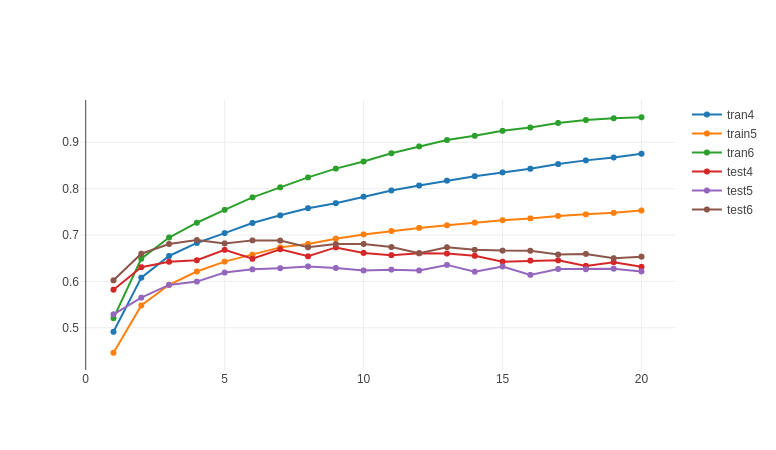

In [38]:
# [Your Work]
iplot([train_acc_trace4, train_acc_trace5,train_acc_trace6, 
       test_acc_trace4, test_acc_trace5,  test_acc_trace6])


### <a id='q2D'/> Quick Quiz 2.C: ตัวแบบที่แม่นยำที่สุดกับตัวแบบที่มีปัญหาโอเวอร์ฟิตติ้งรุนแรงที่สุด
**คำถามแรก** จงเรียงลำดับตัวแบบตามความแม่นยำที่ดีที่สุดในชุดข้อมูลทดสอบที่แต่ละตัวแบบทำได้ โดยให้ตอบมาทั้งหมายเลขตัวแบบและค่าความแม่นยำสูงสุดในชุดข้อมูลทดสอบของตัวแบบทั้งสามประกอบกันไปด้วย

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
6 0.6891<br/>
4 0.6732<br/>
5 0.6355<br/>

**คำถามสอง** ใน epoch สุดท้าย ความแตกต่างระหว่างความแม่นยำในชุดข้อมูลฝึกและความแม่นยำในชุดข้อมูลทดสอบของแต่ละตัวแบบมีค่าเท่าใด จงสดงการคำนวณประกอบสั้น ๆ (เราอ่านค่าความแม่นยำจากกราฟที่วาดด้วย plotly ได้โดยง่าย)

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
4 0.8753-0.6313 = 0.244<br/>
5 0.75286-0.6214 = 0.13146<br/>
6 0.96402-0.6533 = 0.31072<br/>

**คำถามที่สาม** คุณคิดว่าตัวแบบใดที่มีปัญหาโอเวอร์ฟิตติงรุนแรงที่สุด ให้เหตุผลสั้น ๆ ประกอบ

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
6 เพราะ acc ต่างกับ var_acc มากที่สุด

**คำถามที่สี่** ตัวแบบที่ 5 ซึ่งมีจำนวนฟีทเจอร์แม็พน้อยกว่าแบบที่ 4 โดยเปรียบเทียบแล้วมีความแม่นยำเป็นอย่างไร
1. ความแม่นยำในชุดทดสอบที่ดีที่สุดตัวแบบไหนดีกว่า และแตกต่างกันเท่าใด (อย่าลืมว่าเรากำลังเทียบเฉพาะตัวแบบ 4 และ 5 เท่านั้น)
2. ณ epoch สุดท้าย ความแม่นยำในชุดทุดสอบ ตัวแบบไหนดีกว่า และแตกต่างกันเท่าใด
3. จากคำถามสองประเด็นที่ผ่านมา จงอธิบายสั้น ๆ ว่าความเปลี่ยนแปลงต่าง ๆ เมื่อเทียบจากจุดที่ดีที่สุดที่ทั้งสองตัวแบบทำได้กับตอนสิ้นสุดการเรียนรู้ มีความแตกต่างไปในทิศทางใด ทำไมจึงเป็นเช่นนั้น

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
1. 4 แตกต่างกัน 0.6732-0.6355 = 0.0377 <br/>
2. 4 แตกต่างกัน 0.6313-0.6214 = 0.0099 <br/>
3. น้อยลง เพราะmodelใกล้เคียงกัน

### <a id='p2D'/> งานที่ 2.D: จำนวนตัวอย่างในกลุ่มย่อยกับผลกระทบต่อความแม่นยำและระยะเวลาที่ใช้ในการฝึก
ตัวแบบหมายเลข 5 ที่เรานำมาทดสอบก่อนหน้า เป็นตัวแบบที่มีขนาดเล็ก ใช้หน่วยความจำน้อย ทำให้เราสามารถเพิ่มจำนวนตัวอย่างในแต่ละกลุ่มย่อย (minibatch) ได้โดยที่หน่วยความจำใน GPU ยังมีเพียงพอ เหมาะสำหรับการนำมาศึกษาผลกระทบของจำนวนตัวอย่างในกลุ่มย่อย เนื่องจากเราจะสามารถเพิ่มลดจำนวนตัวอย่างให้มีความแตกต่างกันหลายเท่าได้

#### <a id='p2D1'/> งานที่ 2.D.1: กำหนดโครงสร้างของตัวแบบหมายเลข 5 อีกครั้งและฝึกมันด้วยจำนวนตัวอย่างเพียง 8 ตัวอย่างต่อ minibatch
เราจะเริ่มจากการสร้างตัวแปร model ใหม่ซึ่งมีโครงสร้างเดียวกันกับตัวแบบหมายเลข 5 สาเหตุที่ต้องสร้างตัวแปรใหม่แม้ว่าตัวแบบล่าสุดก็มีโครงสร้างแบบเดียวกันก็เพราะเราต้องการที่จะล้างผลการฝึกต่าง ๆ ที่มีมาก่อนหน้าทิ้งแล้วเริ่มต้นใหม่จากศูนย์เพื่อให้การเปรียบเทียบต่าง ๆ เป็นไปในรูปแบบเดียวกัน

จงนิยามโครงสร้างของตัวแบบ 5 อีกครั้งพร้อมทั้งคอมไพล์และพิมพ์สรุปโครงสร้างออกมา

In [39]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(8, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                40970     
Total params: 42,362
Trainable params: 42,362
Non-trainable params: 0
_________________________________________________________________


สั่งฝึกตัวแบบที่ได้มา **โดยให้จำนวนตัวอย่างในกลุ่มย่อยเป็น 8** และให้เก็บประวัติผลการฝึกไว้ในตัวแปร h7 (และเราจะอ้างถึงตัวแบบนี้ว่า ตัวแบบ 7 ในลักษณะเดียวกับที่ผ่านมา) ขอให้สังเกตเรื่องความแม่นยำในชุดข้อมูลฝึกและเวลาที่ใช้ในการฝึกตัวแบบด้วย เพราะนี่คือจุดประสงค์การเรียนรู้ของเราในงานนี้

In [40]:
# [Your Work] fit a model with train images and labels for 20 epochs
h7 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=8)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 25s 492us/sample - loss: 1.4718 - acc: 0.4763 - val_loss: 1.2655 - val_acc: 0.5576
Epoch 2/20
50000/50000 [==============================] - 24s 488us/sample - loss: 1.1807 - acc: 0.5866 - val_loss: 1.1528 - val_acc: 0.5965
Epoch 3/20
50000/50000 [==============================] - 24s 490us/sample - loss: 1.0784 - acc: 0.6238 - val_loss: 1.1131 - val_acc: 0.6153
Epoch 4/20
50000/50000 [==============================] - 24s 489us/sample - loss: 1.0091 - acc: 0.6494 - val_loss: 1.1320 - val_acc: 0.6075
Epoch 5/20
50000/50000 [==============================] - 24s 484us/sample - loss: 0.9588 - acc: 0.6666 - val_loss: 1.1339 - val_acc: 0.6118
Epoch 6/20
50000/50000 [==============================] - 24s 490us/sample - loss: 0.9191 - acc: 0.6811 - val_loss: 1.1859 - val_acc: 0.5988
Epoch 7/20
50000/50000 [==============================] - 24s 488us/sample - loss: 0.8860 - acc: 0.6930 

#### <a id='p2D2' /> งานที่ 2.D.2: กำหนดโครงสร้างของตัวแบบหมายเลข 5 อีกครั้งและฝึกมันด้วยจำนวนตัวอย่างเพียง 128 ตัวอย่างต่อกลุ่มย่อย
เช่นเดิมกับงานที่แล้ว เราต้องการล้างผลการฝึกของตัวแบบ 7 ออกไปเพื่อที่จะได้เริ่มต้นฝึกตัวแบบในงานนี้จาก 0 เราจะต้องสั่งสร้างตัวแปร model ใหม่ตั้งแต่การนิยามโครงสร้างและทำการคอมไพล์พร้อมทั้งพิมพ์สรุปโครงสร้างตัวแบบ

In [42]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(8, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                40970     
Total params: 42,362
Trainable params: 42,362
Non-trainable params: 0
_________________________________________________________________


สั่งฝึกตัวแบบ 8 ที่เพิ่งสร้างขึ้นมานี้ **โดยให้จำนวนตัวอย่างในกลุ่มย่อยเป็น 128** และให้เก็บประวัติผลการฝึกไว้ในตัวแปร h8

In [43]:
# [Your Work] fit a model with train images and labels for 20 epochs
h8 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 124us/sample - loss: 1.6491 - acc: 0.4181 - val_loss: 1.4398 - val_acc: 0.4921
Epoch 2/20
50000/50000 [==============================] - 6s 119us/sample - loss: 1.3470 - acc: 0.5276 - val_loss: 1.3112 - val_acc: 0.5348
Epoch 3/20
50000/50000 [==============================] - 6s 119us/sample - loss: 1.2380 - acc: 0.5683 - val_loss: 1.2160 - val_acc: 0.5699
Epoch 4/20
50000/50000 [==============================] - 6s 120us/sample - loss: 1.1767 - acc: 0.5916 - val_loss: 1.2123 - val_acc: 0.5734
Epoch 5/20
50000/50000 [==============================] - 6s 119us/sample - loss: 1.1213 - acc: 0.6097 - val_loss: 1.1684 - val_acc: 0.5896
Epoch 6/20
50000/50000 [==============================] - 6s 120us/sample - loss: 1.0779 - acc: 0.6247 - val_loss: 1.1652 - val_acc: 0.5935
Epoch 7/20
50000/50000 [==============================] - 6s 120us/sample - loss: 1.0447 - acc: 0.6360 - val_l

#### <a id='p2D3'/> งานที่ 2.D.3: วาดกราฟและเปรียบเทียบผลการฝึกตัวแบบ 5, 7 และ 8
อันดับแรก เตรียมเส้นกราฟของตัวแบบ 7 และ 8 รวม 4 เส้น

In [48]:
# [ํYour Work]
train_acc_trace7 = go.Scatter(
    x = epochs_x2,
    y = h7.history['acc'],
    mode = 'lines+markers',
    name = 'train7'
)

test_acc_trace7 = go.Scatter(
    x = epochs_x2,
    y = h7.history['val_acc'],
    mode = 'lines+markers',
    name = 'test7'
)

train_acc_trace8 = go.Scatter(
    x = epochs_x2,
    y = h8.history['acc'],
    mode = 'lines+markers',
    name = 'tran8'
)

test_acc_trace8 = go.Scatter(
    x = epochs_x2,
    y = h8.history['val_acc'],
    mode = 'lines+markers',
    name = 'test8'
)

วาดกราฟประวัติผลการฝึกของตัวแบบ 5, 7 และ 8

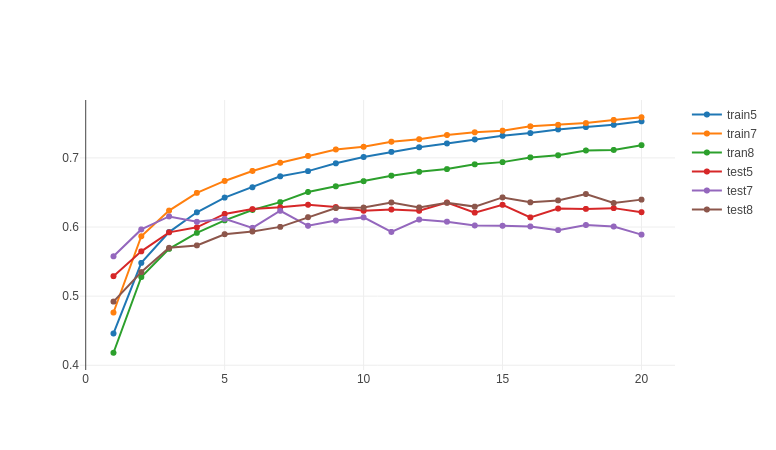

In [49]:
# [Your Work]
iplot([train_acc_trace5, train_acc_trace7, train_acc_trace8,
       test_acc_trace5, test_acc_trace7,  test_acc_trace8 ])

### <a id='q2D'/> Quick Quiz 2.D: ผลกระทบที่สำคัญของจำนวนตัวอย่างในกลุ่มย่อย
ณ จุดนี้ ผมเชื่อว่าคุณได้กราฟที่มีเรื่องให้คุณสังเกตและพิจารณาในหลายประเด็น และเพื่อไม่ให้คุณพลาดประเด็นสำคัญที่เราต้องการศึกษา ซึ่งก็คือผลกระทบของจำนวนตัวอย่างในแต่ละกลุ่มย่อยต่อความแม่นยำของตัวแบบและเวลาที่ใช้ในการฝึกตัวแบบ เราจะทำการสังเกตและพิจารณาแยกไปตามประเด็นต่าง ๆ ดังนี้
**ประเด็นแรก** โดยส่วนใหญ่แล้วความแม่นยำบนชุดข้อมูลฝึกสัมพันธ์กับจำนวนตัวอย่างในแต่ละกลุ่มย่อยอย่างไร จงให้เหตุผลอธิบายเหตุการณ์ที่เกิดขึ้นนี้


(พื้นที่สำหรับตอบคำถาม) <br/><br/>
ใช้เวลาในการฝึกแต่ละการฝึกย่อยน้อยลง เพราะจะเอาค่า batch_size ไปหารกับจำนวนข้อมูลของ train

**ประเด็นที่สอง** จากประเด็นแรก แนวโน้มของผลกระทบของจำนวนตัวอย่างในกลุ่มย่อยต่อความแม่นยำบนชุดข้อมูลทดสอบเป็นไปในแนวทางเดียวกันกับผลกระทบต่อชุดข้อมูลฝึกหรือไม่ (ยังไม่ต้องให้เหตุผล)


(พื้นที่สำหรับตอบคำถาม) <br/><br/>
ไม่

**ประเด็นที่สาม** ณ epoch สุดท้าย ตัวแบบที่มีความแม่นยำบนชุดข้อมูลฝึกน้อยที่สุด ให้ความแม่นยำบนชุดข้อมูลทดสอบน้อยที่สุดด้วยหรือไม่


(พื้นที่สำหรับตอบคำถาม) <br/><br/>
8 <br/>
ไม่น้อย

**ประเด็นที่สี่** จงให้เหตุผลอธิบายเหตุการณ์ที่คุณสังเกตได้จากประเด็นที่สามว่าทำไมจึงเป็นเช่นนั้น


(พื้นที่สำหรับตอบคำถาม) <br/><br/>
ข้อมูลที่ใช้ฝึกน้อยลง เพราะหารด้วยbatch size ใหญ่กว่าตัวอื่น

**ประเด็นที่ห้า** จงให้เหตุผลเกี่ยวกับแนวโน้มของผลกระทบต่อความแม่นยำบนชุดข้อมูลทดสอบที่ถามไว้ในประเด็นที่สอง (แนะนำให้อธิบายควบคู่ไปกับผลกระทบต่อความแม่นยำในชุดข้อมูลฝึกควบคู่กัน เพื่อที่จะเชื่อมโยงไปถึงประเด็นต่าง ๆ ที่มีความเกี่ยวข้องกันได้อย่างชัดเจน)

(พื้นที่สำหรับตอบคำถาม) <br/><br/>

**ประเด็นที่หก** เวลาที่ต้องใช้ในการฝึกตัวแบบทั้ง 3 เป็นเท่าไหร่บ้าง ให้ตอบโดยนำค่า median จากสาม epoch สุดท้ายของแต่ละตัวแบบมาเป็นตัวแทนของเวลาของตัวแบบนั้น ๆ โดยตอบในรูปแบบตามที่กำหนดไว้ในพื้นที่สำหรับตอบคำถาม


(พื้นที่สำหรับตอบคำถาม) <br/><br/>
ตัวแบบ 5 จำนวนตัวอย่างในกลุ่มย่อย = 32 เวลาฝึกต่อ epoch = 9 วินาที <br/>
ตัวแบบ 7 จำนวนตัวอย่างในกลุ่มย่อย = 8 เวลาฝึกต่อ epoch = 24 วินาที <br/>
ตัวแบบ 8 จำนวนตัวอย่างในกลุ่มย่อย = 128 เวลาฝึกต่อ epoch = 6 วินาที <br/>

**ประเด็นที่เจ็ด** แนวโน้มของเวลาที่ใช้ในแต่ละ epoch กับจำนวนตัวอย่างในแต่ละกลุ่มย่อยเป็นอย่างไร

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
batch size มาก เวลาน้อย

## <a id='p3'/> งานที่ 3: Batch Normalization
ในงานที่ 2 เราได้เห็นปัญหาเกี่ยวกับโอเวอร์ฟิตติ้งตลอดจนผลกระทบของจำนวนตัวอย่างในกลุ่มย่อยต่อความแม่นยำของตัวแบบทั้งในชุดข้อมูลฝึกและทดสอบมาแล้ว ถ้าเราทำการทดลองถูก เราควรจะพบว่าความแม่นยำบนชุดข้อมูลฝึกจะมีแนวโน้มต่ำลง หากจำนวนตัวอย่างในกลุ่มย่อยมีมากขึ้น  ในขณะเดียวกัน เราอาจจะพบว่ามันไม่ได้สัมพันธ์กับความแม่นยำในชุดข้อมูลทดสอบมากนัก ซึ่งเหตุที่มันไม่สัมพันธ์กันนี้ อาจจะทำให้เราคิดไปว่าการกำหนดจำนวนตัวอย่างให้น้อยในแต่ละกลุ่มย่อยเป็นเรื่องที่ไม่ดี เพราะใช้เวลาฝึกนานขึ้นและความแม่นยำในชุดข้อมูลทดสอบก็ไม่ได้ดีขึ้น ซ้ำอาจจะแย่ลงด้วยซ้ำ แต่นั่นอาจจะเป็นความเห็นที่ผิดพลาดในหลาย ๆ กรณี

สาเหตุที่มันไม่สัมพันธ์กันกับความแม่นยำในชุดทดสอบนี้มาจากปัญหาโอเวอร์ฟิตติง (ถ้าใครทำแบบควิซที่ผ่านมาแล้วอธิบายปัญหาบางอย่างยังไม่ได้ ลองเอาประเด็นนี้ไปคิดอีกรอบ) นั่นคือหากตัวแบบเราไม่มีปัญหาโอเวอร์ฟิตติง การฝึกที่ให้ความแม่นยำในชุดข้อมูลฝึกที่ดี ก็ควรจะให้ความแม่นยำในชุดข้อมูลทดสอบที่ดีด้วย

แต่ก่อนที่เราจะศึกษากลวิธีในการแก้ปัญหาโอเวอร์ฟิตติง เราจะศึกษาวิธีเพิ่มความแม่นยำของตัวแบบในชุดข้อมูลฝึกก่อน (ซึ่งมันควรจะเพิ่มความแม่นยำในชุดข้อมูลทดสอบด้วย ถ้าหากเราไม่มีปัญหาโอเวอร์ฟิตติง) ซึ่งหนึ่งในเทคนิคที่น่าสนใจมากอันหนึ่งก็คือการใช้ Batch Normalization ซึ่งก็คือ การปรับกลุ่ม (ข้อมูล) ให้เป็นมาตรฐาน (เดียวกัน) 
**หมายเหตุ** เราจะเรียก Batch Normalization ว่าเป็น "การปรับกลุ่มให้เป็นมาตรฐาน" ซึ่งคำพูดในวงเล็บคือสิ่งที่เราละไว้ชื่อเรียกนี้คือสิ่งที่สอดรับกับบริบทการใช้งานซึ่งก็คือ การปรับกลุ่มข้อมูลให้เป็นมาตรฐานเดียวกัน

### <a id='p3A'/> งานที่ 3.A: การสร้างชั้นปรับกลุ่มให้เป็นมาตรฐาน
**ทำความรู้จักกับชั้นปรับกลุ่มให้เป็นมาตรฐาน (Batch-Normalization Layer)** <br/>
ชั้นปรับกลุ่มให้เป็นมาตรฐานมีให้อยู่ในไลบรารีสำหรับการเรียนรู้เชิงลึกจำนวนมาก เนื่องจากมันเป็นกระบวนการที่มักจะให้ผลกระทบที่ชัดเจนและเป็นไปในทิศทางที่ดีขึ้น เนื่องจากแนวคิดของมันคล้ายกับความพยายามของเราในการหารค่าสีด้วย 255 คือปรับเลขให้อยู่ในช่วง 0 ถึง 1  เราจึงมักจะไม่ได้ใช้ชั้นปรับกลุ่มให้เป็นมาตรฐานที่ชั้นแรก แต่เราจะไปใช้อยู่ชั้นด้านในของตัวแบบเพื่อทำให้ค่าตัวเลขที่ส่งไประหว่างชั้นต่าง ๆ อยู่ในช่วงค่าที่เหมาะสมด้วย  อย่างไรก็ตาม เป้าหมายในการปรับกลุ่มให้เป็นมาตรฐานไม่ได้พยายามปรับให้ค่าอยู่ในช่วง 0 ถึง 1 แต่ปรับให้ให้กลุ่มข้อมูลมีค่าเฉลี่ยเป็นศูนย์และความแปรปรวนมีค่าเป็นหนึ่ง (zero mean, unit variance)

โมดูล Keras เตรียมชั้นนี้ไว้ในคลาสชื่อ keras.layers.BatchNormalization ซึ่งมีพารามิเตอร์ที่เราต้องคิดหนักที่สุดคือ axis และเราต้องจริงจังกับพารามิเตอร์ตัวนี้มาก เพราะมันจะส่งผลกับวิธีจัดการข้อมูลในแต่ละกลุ่มที่เราส่งเข้าไปฝึก

โดยทั่วไปแล้ว เราจะพยายามปรับมาตรฐานแยกตามชนิดฟีทเจอร์ ซึ่งในกรณีของภาพสองมิติก็คือการปรับมาตรฐานแยกตามสี (ถ้าเราคิดจะปรับกลุ่มให้เป็นมาตรฐานที่ชั้นข้อมูลเข้า) คือเราจะนำค่าในระนาบสี (color plane) เดียวกันมาคำนวณค่าร่วมกัน เรามักจะไม่ได้เลือกใช้วิธีแตกค่าตามตำแหน่งพิกเซลมาปรับให้เป็นมาตรฐานร่วมกัน

ต่างกันอย่างไร เช่น หากค่าในพิกเซลตำแหน่ง (0, 0) ในกลุ่มสีแดงมีค่าอยู่ในช่วง 0 ถึง 10 และตำแหน่ง (0, 0) ของสีเขียวมีค่าอยู่ในช่วง 50 ถึง 100 ถ้าเราปรับแบบแยกตามสี การปรับค่าที่ตำแหน่ง (0, 0) ของกลุ่มสีแดงก็จะเป็นการพยายามปรับช่วงค่า 0 ถึง 10 อยู่มีค่าเฉลี่ยนเป็น 0 และความแปรปรวนเท่ากับ 1 แต่ถ้าเราปรับแบบแยกตามพิกเซล มันก็จะเป็นการพยายามปรับค่า 0 ถึง 100 ให้มีค่าเฉลี่ยเป็น 0 และความแปรปรวนเท่ากับ 1 ซึ่งอาจจะมีปัญหาในกรณีที่ฟีทเจอร์แต่ละชนิดมีความแตกต่างกันมาก

ปัญหาต่อมาก็คือ เราจะบอก Keras อย่างไรว่าจะปรับแบบแยกตามฟีทเจอร์ **ซึ่งเราจะตอบปัญหานี้ได้อย่างถูกต้องก็ต่อเมื่อเรารู้ว่าข้อมูลที่อยู่ภายในตัวแบบถูกจัดเรียงอย่างไร** โดยในที่นี้ข้อมูลเข้าของเราอยู่ในรูป (32, 32, 3) คือเป็นแบบ channel last (ระบุตำแหน่งพิกเซลก่อนแล้วจึงระบุหมายเลขแชนเนลสีปิดท้าย) ซึ่งต่อมาแม้เราจะทำคอนโวลูชันเปลี่ยนสีเป็นฟีทเจอร์แม็พ ตำแหน่งพิกเซลก็ยังมาก่อนและปิดท้ายด้วยหมายเลขฟีทเจอร์แม็พ เช่นถ้าขนาดภาพยังคงเดิมและมี 8 ฟีทเจอร์แม็พ เราก็จะได้ขนาดของข้อมูลเข้าสำหรับชั้นถัดไปเป็น (32, 32, 8)

ดังนั้นหากเราต้องการปรับแบบแยกตามฟีทเจอร์ เราจะต้องบอก Keras ว่าให้รักษาแกนของฟีทเจอร์ไว้ แล้วยุบแกนอื่น ๆ ทิ้ง เช่นจากข้อมูลที่มีมิติเป็น (32, 32, 8) เราต้องการยุบแกนอื่น ๆ เพื่อให้ได้ขนาดข้อมูลใหม่เป็น (1, 1, 8) คือเก็บแกนสุดท้ายไว้ เราจะระบุพารามิเตอร์ให้เป็น axis=-1 ซึ่งเลข -1 นี้แปลว่าตำแหน่งสุดท้าย 

**หมายเหตุ 1** ในกรณีที่ข้อมูลเราเป็น (8, 32, 32) เราต้องการยุบให้เป็น (8, 1, 1) เราจะใช้ axis=1 เราไม่ใช้ axis=0 เพราะข้อมูลตัวอย่างที่อยู่ในหน่วยความจำแท้จริงแล้วอยู่ด้วยกันเป็นกลุ่มย่อย (minibatch) เช่น ถ้ากลุ่มย่อยเรามี 128 ตัวอย่าง ข้อมูลที่ Keras เห็นก็คือ (128, 8, 32, 32) ดังนั้นแกนฟีทเจอร์ที่เราจะรักษาไว้คือแกนหมายเลข 1 เพราะแกนหมายเลข 0 คือแกนของตัวอย่าง (อย่างไรก็ตาม ห้ามใช้แกนหมายเลข 0 เป็นค่าพารามิเตอร์)

**หมายเหตุ 2** เราสามารถรักษาแกนไว้ได้มากกว่า 1 แกน เช่น ถ้าเรามีข้อมูลเป็น (32, 32, 8) และเราต้องการปรับให้เป็นมาตรฐานโดยยึดตามตำแหน่งพิกเซล เราจะรักษาแกนหมายเลข 1 และ 2 ไว้ (และยุบแกนหมายเลข 3) ด้วยการใช้พารามิเตอร์ axis=[1, 2]

ฟังดูใช้ยากมาก แต่ที่จริงหากเราต้องการใช้วิธีที่นิยมคือปรับตามฟีทเจอร์ เราก็จะใช้ axis=-1 เมื่อข้อมูลเป็นแบบ channel last และใช้ axis=1 เมื่อข้อมูลเป็นแบบ channel first


#### <a id='p3A1'/> งานที่ 3.A.1: สร้างตัวแบบใหม่จากตัวแบบที่ 5 โดยมีการเพิ่มชั้นปรับกลุ่มให้เป็นมาตรฐานเข้าไป
จงสร้างตัวแบบอันใหม่จากตัวแบบ 5 โดยใส่ชั้น BatchNormalization ไว้ด้านหลังชั้นคอนโวลูชันทั้งสอง คือมีชั้น BatchNormalization สองอัน อันแรกตามหลังชั้น Conv2D อันแรก ส่วน BatchNormalization อันที่สองตามหลังชั้น Conv2D อันที่สอง โดยให้ใส่พารามิเตอร์เกี่ยวกับ axis ไว้โดยชัดแจ้ง (ถึงแม้ว่าค่า default ของพารามิเตอร์ใน Keras อาจจะถูกต้องอยู่แล้วก็ตาม)

เมื่อสร้างตัวแบบเสร็จแล้ว ให้คอมไพล์และพิมพ์สรุป (summary) ออกมาทันที

In [50]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(8, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 16, 16, 16)        64        
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                40970     
Total para

ก่อนหน้านี้ เราพบว่าการฝึกตัวแบบโดยมี 128 ตัวอย่างในกลุ่มย่อยจะมีความแม่นยำในระหว่างการฝึกตัวแบบต่ำ เราจึงสนใจที่จะลองฝึกตัวแบบนี้โดยให้กลุ่มย่อยมี 128 ตัวอย่าง เป็นจำนวน 20 epochs โดยเราจะเรียกตัวแบบนี้ว่าตัวแบบ 9 และจะบันทึกประวัติการฝึกไว้ในตัวแปร h9

In [51]:
# [Your Work] fit a model with train images and labels for 20 epochs
h9 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 165us/sample - loss: 1.4932 - acc: 0.4863 - val_loss: 1.7593 - val_acc: 0.3328
Epoch 2/20
50000/50000 [==============================] - 8s 158us/sample - loss: 1.1267 - acc: 0.6066 - val_loss: 1.2827 - val_acc: 0.5659
Epoch 3/20
50000/50000 [==============================] - 8s 155us/sample - loss: 1.0081 - acc: 0.6478 - val_loss: 1.1509 - val_acc: 0.6030
Epoch 4/20
50000/50000 [==============================] - 8s 154us/sample - loss: 0.9316 - acc: 0.6745 - val_loss: 1.4079 - val_acc: 0.5500
Epoch 5/20
50000/50000 [==============================] - 8s 157us/sample - loss: 0.8804 - acc: 0.6931 - val_loss: 1.2912 - val_acc: 0.5751
Epoch 6/20
50000/50000 [==============================] - 8s 158us/sample - loss: 0.8380 - acc: 0.7076 - val_loss: 1.1577 - val_acc: 0.6228
Epoch 7/20
50000/50000 [==============================] - 8s 155us/sample - loss: 0.8092 - acc: 0.7194 - val_l

เมื่อฝึกตัวแบบ 9 เสร็จแล้ว ลองสังเกตดูว่าความแม่นยำในชุดข้อมูลฝึกและทดสอบเปลี่ยนแปลงไปในทิศทางใด

#### <a id='p3A2'/> งานที่ 3.A.2: ลองใช้ชั้นปรับกลุ่มให้เป็นมาตรฐานเมื่อจำนวนตัวอย่างในกลุ่มย่อยมี 32 ตัวอย่าง
เราจะสร้างตัวแบบ 10 ขึ้นมาในทำนองเดียวกันกับตัวแบบ 9 ทุกประการ เว้นเสียแต่ตอนฝึก (fit) เราจะกำหนดให้ค่า batch_size เป็น 32 <br/>
จงนิยามโครงสร้างตัวอย่าง คอมไพล์ และพิมพ์สรุป โดยใช้โครงสร้างจากตัวแบบ 9 ทุกประการ

In [52]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(8, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 16, 16, 16)        64        
_________________________________________________________________
flatten_9 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                40970     
Total para

จงฝึกตัวแบบ 10 นี้โดยให้มี 32 ตัวอย่างในแต่ละกลุ่มย่อย และฝึกเป็นจำนวน 20 epochs  ทำนองเดียวกันกับที่ผ่านมา ให้เก็บประวัติการฝึกตัวแบบไว้ในตัวแปร h10

In [53]:
# [Your Work] fit a model with train images and labels for 20 epochs
h10 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 247us/sample - loss: 1.5027 - acc: 0.4868 - val_loss: 1.4365 - val_acc: 0.5055
Epoch 2/20
50000/50000 [==============================] - 12s 240us/sample - loss: 1.1254 - acc: 0.6068 - val_loss: 1.3872 - val_acc: 0.5242
Epoch 3/20
50000/50000 [==============================] - 12s 241us/sample - loss: 1.0118 - acc: 0.6475 - val_loss: 1.1276 - val_acc: 0.6149
Epoch 4/20
50000/50000 [==============================] - 12s 240us/sample - loss: 0.9415 - acc: 0.6737 - val_loss: 1.1188 - val_acc: 0.6202
Epoch 5/20
50000/50000 [==============================] - 12s 239us/sample - loss: 0.8881 - acc: 0.6924 - val_loss: 1.1039 - val_acc: 0.6298
Epoch 6/20
50000/50000 [==============================] - 12s 239us/sample - loss: 0.8484 - acc: 0.7046 - val_loss: 1.1480 - val_acc: 0.6073
Epoch 7/20
50000/50000 [==============================] - 12s 241us/sample - loss: 0.8148 - acc: 0.7168 

### <a id='p3B'/> งานที่ 3.B: สำรวจและวิเคราะห์ผลกระทบจากการใช้ชั้นปรับกลุ่มให้เป็นมาตรฐาน
เราได้สร้างและทดลองใช้งานชั้นปรับกลุ่มให้เป็นมาตรฐานเรียบร้อยแล้ว ในงานนี้เราจะนำประวัติผลการฝึกมาวิเคราะห์เพื่อศึกษาผลกระทบจากการใช้ชั้นชนิดนี้

#### <a id='p3B1'/> งานที่ 3.B.1: เตรียมข้อมูลเส้นกราฟประวัติการฝึกตัวแบบ 9 และ 10
จงเตรียมข้อมูลเส้นกราฟประวัติการฝึกตัวแบบ 9 และ 10 รวม 4 เส้นในลักษณะเดียวกับที่เคยทำมาก่อนหน้า

In [54]:
# [ํYour Work]
train_acc_trace9 = go.Scatter(
    x = epochs_x2,
    y = h9.history['acc'],
    mode = 'lines+markers',
    name = 'train9'
)

test_acc_trace9 = go.Scatter(
    x = epochs_x2,
    y = h9.history['val_acc'],
    mode = 'lines+markers',
    name = 'test9'
)

train_acc_trace10 = go.Scatter(
    x = epochs_x2,
    y = h10.history['acc'],
    mode = 'lines+markers',
    name = 'tran10'
)

test_acc_trace10 = go.Scatter(
    x = epochs_x2,
    y = h10.history['val_acc'],
    mode = 'lines+markers',
    name = 'test10'
)

**พล็อตกราฟประวัติการฝึกของตัวแบบ 5, 8, 9 และ 10 และตอบคำถามในควิซที่ตามมา**

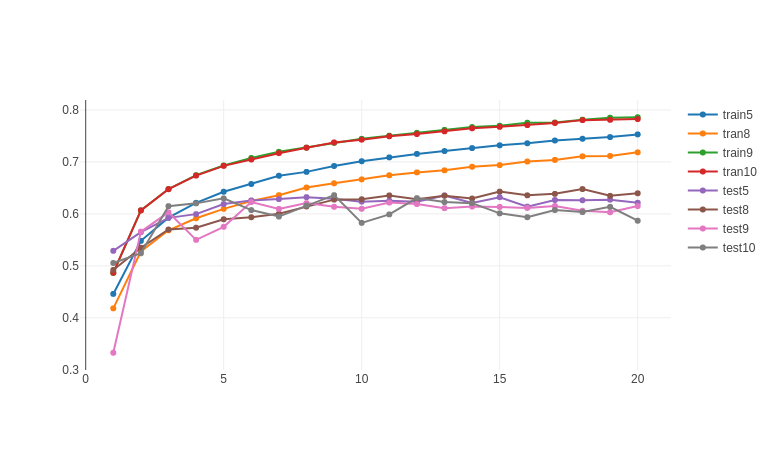

In [55]:
# [Your Work]
# [Your Work]
iplot([train_acc_trace5, train_acc_trace8,train_acc_trace9, train_acc_trace10,
       test_acc_trace5, test_acc_trace8,  test_acc_trace9, test_acc_trace10 ])

### <a id='q3B'/> Quick Quiz 3.B: ใช้การปรับกลุ่มให้เป็นมาตรฐานแล้วเป็นอย่างไร
จากตัวแบบที่เกี่ยวช้อง ตัวแบบ 5 และ 10 มีจำนวนตัวอย่างในกลุ่มย่อย 32 ตัวอย่าง ต่างกันเพียงเรื่องการใช้ชั้นปรับกลุ่มให้เป็นมาตรฐาน ส่วนตัวแบบ 8 และ 9 มีจำนวนตัวอย่างในกลุ่มย่อย 128 ตัวอย่าง ต่างกันเพียงเรื่องของการใช้ชั้นปรับกลุ่มให้เป็นมาตรฐานเช่นกัน จงตอบคำถามตามประเด็นต่าง ๆ ดังนี้

**ประเด็นแรก** การใช้การปรับกลุ่มให้เป็นมาตรฐาน ทำให้ความแม่นยำในชุดข้อมูลฝึกของตัวแบบ 9 เพิ่มขึ้นจากตัวแบบ 8 ถึง 0.05 หรือไม่ (เพิ่ม 0.05 คือค่าตามแกน y ซึ่งหมายถึง 5%)

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
ใช่

**ประเด็นที่สอง** แล้วการปรับกลุ่มให้เป็นมาตรฐานส่งผลต่อความแม่นยำในชุดข้อมูลฝึกของตัวแบบ 10 ให้เพิ่มจากตัวแบบ 5 ถึง 0.05 หรือไม่ ผลกระทบจากการใช้การปรับกลุ่มให้เป็นมาตรฐานในตัวแบบทั้งสอง (ตัวแบบ 9 และ 10) นี้มีน้ำหนักที่แตกต่างกันอย่างมีนัยสำคัญหรือไม่ ทำไมจึงเป็นเช่นนั้น

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
ไม่ <br/>
ไม่ เพราะมีค่าที่ใกล้เคียงกัน

**ประเด็นที่สาม** ความแตกต่างของความแม่นยำในชุดข้อมูลฝึกของตัวแบบที่ 5 และ 8 ต่างกันเท่าใด และความแตกต่างระหว่างตัวแบบ 9 กับ 10 ต่างกันเท่าใด(ดูจาก epoch สุดท้าย ซึ่งในคำถามที่ตามมา หากไม่ระบุ epoch ให้ถือผลลัพธ์จาก epoch สุดท้ายเป็นสำคัญ)

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
0.75286-0.71838=0.03448<br/>
0.7859-0.7824=0.0035

**ประเด็นที่สี่** จากประเด็นที่สาม การปรับกลุ่มให้เป็นมาตรฐานช่วยลดความแตกต่างของการใช้จำนวนตัวอย่างในกลุ่มย่อยให้น้อยลงหรือไม่ ถ้าลดลง ลดลงร้อยละเท่าใด และถ้าเพิ่มขึ้น เพิ่มขึ้นร้อยละเท่าใด

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
ลดลง 10%

**ประเด็นที่ห้า** แนวโน้มของผลกระทบของการปรับกลุ่มให้เป็นมาตรฐานที่มีต่อความแม่นยำในชุดข้อมูลทดสอบสวนทางกับผลกระทบต่อความแม่นยำในชุดข้อมูลฝึกหรือไม่ 

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
สวนทาง

**ประเด็นที่หก** จงวิเคราะห์และให้เหตุผลอธิบายสาเหตุของแนวโน้มของผลกระทบต่อความแม่นยำในข้อมูลฝึกและทดสอบ

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
ข้อมูล train จำคำตอบได้

**ประเด็นที่เจ็ด** การใช้การปรับกลุ่มให้เป็นมาตรฐานในตัวแบบ 9 ส่งผลกระทบต่อเวลาคำนวณให้เพิ่มขึ้นร้อยละเท่าใด และสำหรับตัวแบบ 10 ผลกระทบต่อเวลาคำนวณเพิ่มขึ้นร้อยละเท่าใด ผลกระทบด้านเวลาที่เกิดขึ้นในทั้งสองตัวแบบแตกต่างกันมากหรือไม่ จงวิเคราะห์และอธิบายถึงสาเหตุที่ทำให้มีความแตกต่างกันมากหรือน้อย

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
66.6% <br/>
75%<br/>
มาก เพราะ 9 และ 10 ต้องใช้เวลากับ Batch-Normalization Layer ด้วย

## <a id='p4'/> งานที่ 4: Dropout
เราได้พยายามเพิ่มความแม่นยำมาหลายทาง ล่าสุดในงานที่แล้วเราได้ใช้ Batch Normalization ในความพยายามเพิ่มความแม่นยำ แต่สิ่งที่เกิดขึ้นก็คือตัวแบบของเราติดปัญหาโอเวอร์ฟิตติง ทำให้ความแม่นยำเพิ่มขึ้นเฉพาะกับชุดข้อมูลฝึก และลดลงในชุดข้อมูลทดสอบ 

ความเป็นไปได้หนึ่งในการแก้ปัญหานี้ก็คือการใช้ Dropout ปิดโหนดบางโหนดแบบสุ่ม ส่งผลให้ตัวแบบอาศัยการจำคำตอบได้น้อยลง และต้องพึ่งพาการหาคำตอบแบบทั่วไปให้มากขึ้น เพราะใช้การจำแบบเจาะจงคำตอบของตัวอย่างที่ใช้เรียนรู้ได้น้อยลง

ปัญหาที่สำคัญของการใช้ Dropout ก็คือเราเดาได้ยากว่าจะปิดโหนดไปร้อยละเท่าใด และผลการทดลองอาจจะไม่เสถียรนัก คือความแม่นยำในชุดข้อมูลทดสอบมักจะเปลี่ยนไปมากในแต่ละ epoch  อย่างไรก็ตาม <a id='d4guide'>แนวทางการใช้ Dropout</a> ที่เป็นไปได้ว่าจะให้ผลดีเป็นส่วนใหญ่ก็คือ 
1. ถ้าความแตกต่างของความแม่นยำที่ได้จากข้อมูลฝึกและทดสอบต่างกันมาก เราอาจจะปิดโหนดได้มากถึงร้อยละ 50 และถ้าความแตกต่างน้อย เราอาจจะปิดเพียงร้อยละ 20
2. ควรเน้นใช้ Dropout ที่ชั้นท้าย ๆ (เช่นก่อนถึงชั้น Dense ที่เป็นชั้นผลลัพธ์)
3. เราสามารถใช้ชั้น Dropout ได้มากกว่าหนึ่งชั้นก็จริง แต่การใช้มากกว่า 2 ชั้นมักจะยากที่จะให้ผลลัพธ์ที่ดีขึ้น และ 
4. ถ้าเราใช้ Dropout แล้วมีชั้น Batch Normalization ตามมาในโครงข่าย เราอาจจะพบว่าความแม่นยำที่ได้มักจะต่ำ และความแม่นยำระหว่างการฝึกไม่เสถียร กล่าวคือถ้ามีการใช้ Batch Normalization อยู่มาก เราอาจจะเลือกใช้ Dropout เฉพาะชั้นด้านท้ายเพียงหนึ่งครั้ง อย่างไรก็ตาม มีบางกรณีเหมือนกันที่ใช้ Dropout ก่อนถึง Batch Normalization เพิ่มอีกชั้นแล้วได้ผลที่ดีขึ้น แต่เราไม่ควรคาดหวังว่าเราจะอยู่ในกรณีเช่นนั้น เพราะหลักการทางคณิตศาสตร์ใน Batch Normalization ทำให้การเติม Dropout ก่อนเรียกใช้ Batch Normalization เกิดโทษมากกว่าประโยชน์

### <a id='p4A'/> งานที่ 4.A: ทดลองใช้ Dropout กับตัวแบบ 9
ตัวแบบ 9 นั้นมีการใช้ Batch Normalization เสริมเข้าไปในตัวแบบ 8 แต่ผลลัพธ์ที่ได้นั้นบางครั้งก็ดีขึ้น บางครั้งก็แย่ลง ทว่าสิ่งที่น่าจะเกิดขึ้นกับทุกคนที่ทำการทดลองก็คือปัญหาโอเวอร์ฟิตดูรุนแรงขึ้น ถึงแม้จะยังไม่หนักมาก แต่ก็พอจะมองเห็นช่องทางการใช้ Dropout มาลดปัญหาโอเวอร์ฟิตนี้ได้

จงใส่ชั้น Dropout ไว้หลังชั้น Flatten และตั้งพารามิเตอร์การปิดโหนดให้มีค่าเป็น 20% ซึ่งก็คือ 0.2 จากนั้นคอมไพล์และพิมพ์สรุปตัวแบบออกมา

In [57]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(8, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 16, 16, 16)        64        
_________________________________________________________________
flatten_10 (Flatten)         (None, 4096)              0         
___________________________

สั่งฝึกตัวแบบ 11 โดยให้มีจ 128 ตัวอย่างในกลุ่มย่อย ฝึก 20 epochs และเก็บประวัติการฝึกไว้ในตัวแปร h11

In [58]:
# [Your Work] fit a model with train images and labels for 20 epochs
h11 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 177us/sample - loss: 1.6474 - acc: 0.4466 - val_loss: 1.6161 - val_acc: 0.4283
Epoch 2/20
50000/50000 [==============================] - 8s 168us/sample - loss: 1.2684 - acc: 0.5616 - val_loss: 1.2840 - val_acc: 0.5468
Epoch 3/20
50000/50000 [==============================] - 8s 167us/sample - loss: 1.1520 - acc: 0.5986 - val_loss: 1.4110 - val_acc: 0.5200
Epoch 4/20
50000/50000 [==============================] - 8s 167us/sample - loss: 1.0783 - acc: 0.6253 - val_loss: 1.3463 - val_acc: 0.5522
Epoch 5/20
50000/50000 [==============================] - 8s 169us/sample - loss: 1.0349 - acc: 0.6408 - val_loss: 1.1180 - val_acc: 0.6188
Epoch 6/20
50000/50000 [==============================] - 8s 167us/sample - loss: 0.9923 - acc: 0.6571 - val_loss: 1.2098 - val_acc: 0.5753
Epoch 7/20
50000/50000 [==============================] - 8s 169us/sample - loss: 0.9716 - acc: 0.6639 - val_l

พิมพ์ค่าความแม่นยำสูงสุดในชุดข้อมูลทดสอบที่ตัวแบบ 8, 9 และ 11 ทำได้ (ใช้ print(np.max ...))
สังเกตดูด้วยว่าความแม่นยำสูงสุดในตัวแบบ 11 ดีขึ้นกว่า 9 ไหมและสามารถชนะหรือใกล้เคียงกับตัวแบบ 8 ไหม

In [59]:
# [ํYour Work]
print(np.max(h8.history['acc']))
print(np.max(h9.history['acc']))
print(np.max(h11.history['acc']))

0.71838
0.7859
0.71458


เช่นเดิม เตรียมข้อมูลกราฟประวัติการฝึกตัวแบบ 11 และเพื่อความกระชับ ให้วาดกราฟเปรียบเทียบตัวแบบ 8 9 และ 11 ต่อทันทีในเซลล์ของโค้ดข้างล่างนี้

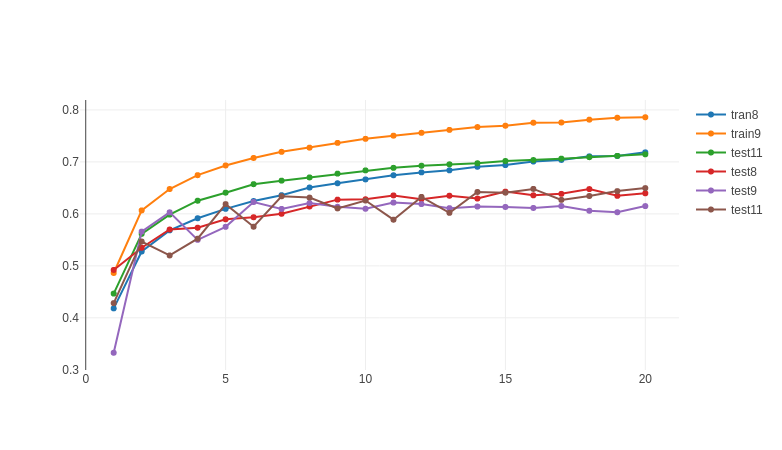

In [61]:
# [ํYour Work]
train_acc_trace11 = go.Scatter(
    x = epochs_x2,
    y = h11.history['acc'],
    mode = 'lines+markers',
    name = 'test11'
)
test_acc_trace11 = go.Scatter(
    x = epochs_x2,
    y = h11.history['val_acc'],
    mode = 'lines+markers',
    name = 'test11'
)

iplot([train_acc_trace8, train_acc_trace9, train_acc_trace11,
        test_acc_trace8, test_acc_trace9, test_acc_trace11])

### <a id='p4B'/> งานที่ 4.B: ใช้ Dropout ดึงศักยภาพของตัวแบบที่มีปัญหาโอเวอร์ฟิตติงรุนแรง
ในบรรดาตัวแบบที่เราฝึกมาทั้งหมด อาจจะกล่าวได้ว่าตัวแบบ 6 มีปัญหาโอเวอร์ฟิตติงมากที่สุด เนื่องจากความแม่นยำของตัวแบบในชุดข้อมูลฝึกมีค่าสูงกว่าความแม่นยำในชุดข้อมูลทดสอบมากที่สุด

จงใส่ชั้น Dropout สองชั้น แต่ละชั้นปิดโหนดร้อยละ 25 โดยชั้นแรกต่อจาก Conv2D อันที่หนึ่ง และ Dropout อีกชั้นอยู่ต่อจาก Conv2D อันที่สอง ซึ่งระดับความรุนแรงของปัญหาโอเวอร์ฟิตติงในตัวแบบ 9 ทำให้เราใส่สองช้้นแบบนี้ได้

In [64]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(8, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                40970     
Total para

ลองฝึกตัวแบบ 12 นี้ดู 20 epochs และมี 64 ตัวอย่างต่อกลุ่มย่อย (ที่ใช้ 64 เพราะเราไม่ได้ใช้ Batch Normalization และ GPU ของบางคนอาจจะมีหน่วยความจำน้อยเกินไปที่จะใส่ตัวอย่างมาก ๆ ได้

In [65]:
# [Your Work] fit a model with train images and labels for 20 epochs
h12 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 209us/sample - loss: 1.6067 - acc: 0.4283 - val_loss: 1.4175 - val_acc: 0.5136
Epoch 2/20
50000/50000 [==============================] - 10s 196us/sample - loss: 1.3341 - acc: 0.5287 - val_loss: 1.2952 - val_acc: 0.5514
Epoch 3/20
50000/50000 [==============================] - 10s 198us/sample - loss: 1.2384 - acc: 0.5629 - val_loss: 1.2181 - val_acc: 0.5827
Epoch 4/20
50000/50000 [==============================] - 10s 208us/sample - loss: 1.1801 - acc: 0.5853 - val_loss: 1.2000 - val_acc: 0.5908
Epoch 5/20
50000/50000 [==============================] - 10s 205us/sample - loss: 1.1449 - acc: 0.5966 - val_loss: 1.1647 - val_acc: 0.5935
Epoch 6/20
50000/50000 [==============================] - 10s 206us/sample - loss: 1.1153 - acc: 0.6074 - val_loss: 1.1649 - val_acc: 0.5883
Epoch 7/20
50000/50000 [==============================] - 11s 211us/sample - loss: 1.0865 - acc: 0.6171 

เราจะลองนำตัวแบบ 6 มาดัดแปลงอีกครั้ง โดยครั้งนี้จะลองใส่ชั้น Dropout เพียงหนึ่งชั้นก่อนหรือหลัง Flatten ก็ได้ (ที่จริงให้ผลเหมือนกัน แต่เรานิยมทำหลัง Flatten มากกว่า) และตั้งอัตราการปิดโหนดไว้ที่ร้อยละ 50

In [67]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(8, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.50),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
flatten_13 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                40970     
Total params: 42,362
Trainable params: 42,362
Non-trainable params: 0
_________________________________________________________________


ฝึกตัวแบบ 13 ต่อแบบเดียวกับตัวแบบ 12 และเก็บประวัติการฝึกไว้ในตัวแปร h13

In [68]:
h13 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 168us/sample - loss: 1.6119 - acc: 0.4264 - val_loss: 1.4056 - val_acc: 0.5001
Epoch 2/20
50000/50000 [==============================] - 8s 157us/sample - loss: 1.3594 - acc: 0.5164 - val_loss: 1.3404 - val_acc: 0.5186
Epoch 3/20
50000/50000 [==============================] - 8s 157us/sample - loss: 1.2928 - acc: 0.5444 - val_loss: 1.2343 - val_acc: 0.5664
Epoch 4/20
50000/50000 [==============================] - 8s 157us/sample - loss: 1.2478 - acc: 0.5613 - val_loss: 1.2060 - val_acc: 0.5766
Epoch 5/20
50000/50000 [==============================] - 8s 160us/sample - loss: 1.2118 - acc: 0.5718 - val_loss: 1.1629 - val_acc: 0.5894
Epoch 6/20
50000/50000 [==============================] - 8s 157us/sample - loss: 1.1840 - acc: 0.5846 - val_loss: 1.1420 - val_acc: 0.5979
Epoch 7/20
50000/50000 [==============================] - 8s 159us/sample - loss: 1.1576 - acc: 0.5936 - val_l

เราจะลองนำตัวแบบ 6 มาดัดแปลงอีกรอบ โดยใส่ Batch Normalization สองชั้นในลักษณะเดียวกันกับที่เราทำมาก่อนหน้ากับตัวแบบอื่น ๆ (แต่จะยังไม่ใส่ Dropout)

In [69]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v1_8 (Ba (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_v1_9 (Ba (None, 16, 16, 64)        256       
_________________________________________________________________
flatten_14 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                163850    
Total para

ฝึกตัวแบบ 14 ต่อแบบเดียวกับตัวแบบ 12 และเก็บประวัติการฝึกไว้ในตัวแปร h14

In [70]:
# [Your Work] fit a model with train images and labels for 20 epochs
h14 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 20s 396us/sample - loss: 1.6656 - acc: 0.5272 - val_loss: 1.9933 - val_acc: 0.4604
Epoch 2/20
50000/50000 [==============================] - 19s 381us/sample - loss: 0.9577 - acc: 0.6820 - val_loss: 1.1728 - val_acc: 0.6168
Epoch 3/20
50000/50000 [==============================] - 19s 382us/sample - loss: 0.7480 - acc: 0.7449 - val_loss: 1.2331 - val_acc: 0.6249
Epoch 4/20
50000/50000 [==============================] - 19s 382us/sample - loss: 0.6185 - acc: 0.7874 - val_loss: 1.1729 - val_acc: 0.6458
Epoch 5/20
50000/50000 [==============================] - 19s 382us/sample - loss: 0.5104 - acc: 0.8240 - val_loss: 1.5403 - val_acc: 0.5957
Epoch 6/20
50000/50000 [==============================] - 19s 380us/sample - loss: 0.4408 - acc: 0.8454 - val_loss: 1.5069 - val_acc: 0.6346
Epoch 7/20
50000/50000 [==============================] - 19s 382us/sample - loss: 0.3707 - acc: 0.8686 

เรายังจะศึกษาการปรับตัวแบบ 6 ต่อไป แต่ครั้งนี้เราจะนำตัวแบบ 14 มาเพิ่ม Dropout สองชั้น โดยมีอัตราการปิดโหนดของแต่ละชั้นร้อยละ 25 และใส่เข้าไปหลังการทำ Batch Normalization

In [71]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v1_10 (B (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_v1_11 (B (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
__________

ฝึกตัวแบบ 15 ต่อแบบเดียวกับตัวแบบ 12 และเก็บประวัติการฝึกไว้ในตัวแปร h15

In [72]:
# [Your Work] fit a model with train images and labels for 20 epochs
h15 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 28s 569us/sample - loss: 1.8603 - acc: 0.4824 - val_loss: 2.6788 - val_acc: 0.4468
Epoch 2/20
50000/50000 [==============================] - 28s 557us/sample - loss: 1.1270 - acc: 0.6245 - val_loss: 2.6617 - val_acc: 0.4655
Epoch 3/20
50000/50000 [==============================] - 28s 555us/sample - loss: 0.9329 - acc: 0.6777 - val_loss: 2.0780 - val_acc: 0.5350
Epoch 4/20
50000/50000 [==============================] - 28s 556us/sample - loss: 0.8214 - acc: 0.7146 - val_loss: 1.3015 - val_acc: 0.6103
Epoch 5/20
50000/50000 [==============================] - 28s 555us/sample - loss: 0.7607 - acc: 0.7353 - val_loss: 1.1635 - val_acc: 0.6421
Epoch 6/20
50000/50000 [==============================] - 28s 556us/sample - loss: 0.7112 - acc: 0.7513 - val_loss: 1.3879 - val_acc: 0.5977
Epoch 7/20
50000/50000 [==============================] - 28s 552us/sample - loss: 0.6673 - acc: 0.7673 

เอาล่ะ เราจะลองสร้างตัวแบบอันสุดท้ายแล้ว ซึ่งความแตกต่างจากตัวแบบที่แล้วก็คือว่า เราจะใส่ชั้น Dropout เพียงชั้นเดียวหลังจากทำ Batch Normalization ครั้งสุดท้าย และกำหนดให้มีอัตราการปิดโหนดที่ร้อยละ 50

In [73]:
# [Your Work] ระบุโครงสร้าง คอมไพล์ และพิมพ์ summary
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3,3), input_shape=(32, 32, 3), activation=tf.nn.relu, padding='same'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(0.50),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v1_12 (B (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_v1_13 (B (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 16384)             0         
__________

ฝึกตัวแบบ 16 ต่อแบบเดียวกับตัวแบบ 12 และเก็บประวัติการฝึกไว้ในตัวแปร h16

In [74]:
# [Your Work] fit a model with train images and labels for 20 epochs
h16 = model.fit(train_images, train_labels, epochs=20 , validation_data=(test_images,test_labels), batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 454us/sample - loss: 2.1539 - acc: 0.4560 - val_loss: 1.2658 - val_acc: 0.5749
Epoch 2/20
50000/50000 [==============================] - 22s 437us/sample - loss: 1.2453 - acc: 0.5942 - val_loss: 1.2514 - val_acc: 0.5794
Epoch 3/20
50000/50000 [==============================] - 22s 436us/sample - loss: 0.9907 - acc: 0.6596 - val_loss: 1.0544 - val_acc: 0.6372
Epoch 4/20
50000/50000 [==============================] - 22s 436us/sample - loss: 0.8913 - acc: 0.6917 - val_loss: 1.0331 - val_acc: 0.6518
Epoch 5/20
50000/50000 [==============================] - 22s 436us/sample - loss: 0.8387 - acc: 0.7073 - val_loss: 0.9856 - val_acc: 0.6621
Epoch 6/20
50000/50000 [==============================] - 22s 435us/sample - loss: 0.7949 - acc: 0.7214 - val_loss: 0.8927 - val_acc: 0.6953
Epoch 7/20
50000/50000 [==============================] - 22s 435us/sample - loss: 0.7597 - acc: 0.7350 

### <a id='p4C'/> งานที่ 4.C: วิเคราะห์ผลลัพธ์ที่ได้เพื่อศึกษาผลกระทบต่อการใช้ Dropout ในรูปแบบต่าง ๆ
ตอนนี้เรามีข้อมูลเชิงตัวเลขอยู่เต็มไปหมด เพื่อให้เราวิเคราะห์ผลลัพธ์ได้โดยง่าย เราจะมุ่งเน้นหาค่าสถิติที่สำคัญออกมา ซึ่งอันดับแรกเราจะพิมพ์ความแม่นยำสูงสุดในชุดข้อมูลทดสอบที่ตัวแบบ 6, 12, 13, ..., 16 ทำได้ (ใช้ print(np.max ..) เช่นเดียวกับที่เคยทำมาก่อน)

In [77]:
# [ํYour Work]
print(np.max(h6.history["val_acc"]))
print(np.max(h12.history["val_acc"]))
print(np.max(h13.history["val_acc"]))
print(np.max(h14.history["val_acc"]))
print(np.max(h15.history["val_acc"]))
print(np.max(h16.history["val_acc"]))

0.6891
0.6426
0.6405
0.655
0.6802
0.7232


จะวาดกราฟทั้งหมดจากตัวแบบ 6 ตัวก็จะได้กราฟ 12 เส้น แบบนี้คงจะทำให้อ่านกราฟลำบาก ดังนั้นเราจะเน้นดึงค่าสถิติที่น่าสนใจออกมาแทน ซึ่งหากเราอยากศึกษาว่าปัญหา โอเวอร์ฟิตติงนั้นลดลงไปเพียงใด เราอาจจะนำความแม่นยำสูงสุดในข้อมูลฝึกลบด้วยความแม่นยำสูงสุดในข้อมูลทดสอบ 

เมื่อทำแบบนี้กับทั้ง 6 ตัวแบบ เราก็จะทราบได้ว่าช่องว่างของความแม่นยำระหว่างฝึกกับการทดสอบมีมากเพียงใด

In [78]:
print("model 6: {:0.4f}".format(np.max(h6.history['acc']) - np.max(h6.history['val_acc'])))
print("model 12: {:0.4f}".format(np.max(h12.history['acc']) - np.max(h12.history['val_acc'])))
print("model 13: {:0.4f}".format(np.max(h13.history['acc']) - np.max(h13.history['val_acc'])))
print("model 14: {:0.4f}".format(np.max(h14.history['acc']) - np.max(h14.history['val_acc'])))
print("model 15: {:0.4f}".format(np.max(h15.history['acc']) - np.max(h15.history['val_acc'])))
print("model 16: {:0.4f}".format(np.max(h16.history['acc']) - np.max(h16.history['val_acc'])))

model 6: 0.2649
model 12: 0.0312
model 13: 0.0031
model 14: 0.3112
model 15: 0.1789
model 16: 0.0925


เตรียมข้อมูลเส้นกราฟความแม่นยำในชุดข้อมูลทดสอบของตัวแบบ 12 ถึง 16 เสร็จแล้ววาดกราฟความแม่นยำนี้ออกมาพร้อมกับความแม่นยำของตัวแบบ 6

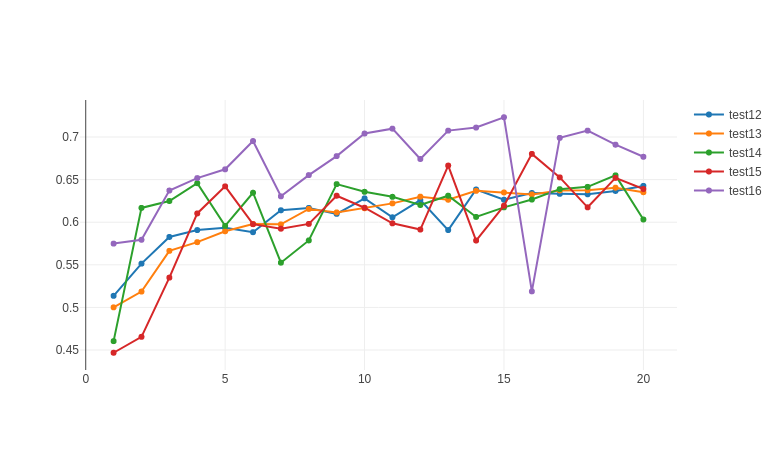

In [79]:
# [ํYour Work]
test_acc_trace12 = go.Scatter(
    x = epochs_x2,
    y = h12.history['val_acc'],
    mode = 'lines+markers',
    name = 'test12'
)

test_acc_trace13 = go.Scatter(
    x = epochs_x2,
    y = h13.history['val_acc'],
    mode = 'lines+markers',
    name = 'test13'
)

test_acc_trace14 = go.Scatter(
    x = epochs_x2,
    y = h14.history['val_acc'],
    mode = 'lines+markers',
    name = 'test14'
)

test_acc_trace15 = go.Scatter(
    x = epochs_x2,
    y = h15.history['val_acc'],
    mode = 'lines+markers',
    name = 'test15'
)

test_acc_trace16 = go.Scatter(
    x = epochs_x2,
    y = h16.history['val_acc'],
    mode = 'lines+markers',
    name = 'test16'
)

iplot([test_acc_trace12, test_acc_trace13, test_acc_trace14, test_acc_trace15, test_acc_trace16])

### Quick Quiz 4C: อภิปรายผลกระทบจากการใช้ Dropout

**ประเด็นแรก** จาก[งาน 4.A](#p4A) คุณคิดว่าแนวโน้มในระยะยาว (คือเกินกว่า 20 epochs ที่เราทดลองอยู่นี้) ความแม่นยำในชุดทดสอบของตัวแบบ 11 จะดีกว่าของตัวแบบ 9 หรือไม่ จงอภิปรายเหตุผลที่คุณเชื่อเช่นนั้นจากการผลทดลองที่ได้  (ผลการทดลองของแต่ละคนอาจจะไม่เหมือนกัน ข้อนี้อย่าลอกแบบไม่คิดมาเป็นอันขาด)

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
ดีกว่าเพราะ 11 มีการใช้drop out 


**ประเด็นที่สอง** จากผลการทดลองใน[งาน 4.B](#p4B) และผลลัพธ์ที่เห็นใน[งาน 4.C](#p4C) คุณเห็นด้วยหรือเห็นต่างจากจาก[แนวทางการใช้ Dropout 4 ข้อ](#d4guide)ที่ให้ไว้ตอนต้นของงานที่ 4 อย่างไรบ้าง จงอภิปรายเหตุผลโดยอ้างอิงจากการทดลองที่คุณได้รับ

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
เห็นด้วย เพราะ ค่าtrian และ test มีผลต่างที่น้อย และได้ค่าtest สูง

**ประเด็นที่สาม** จากผลการทดลองในงานที่ 4 ทั้งหมด (ทั้ง A, B, C) คุณคิดว่าการใช้ Dropout ร่วมกับ Batch Normalization ให้ผลลัพธ์ที่คงเส้นคงวาหรือไม่ จงอธิบายเหตุผลและข้อสังเกตที่พบในผลลัพธ์ที่สนับสนุนความคิดเห็นของคุณ

(พื้นที่สำหรับตอบคำถาม) <br/><br/>
ไม่ เพราะจากกราฟ test16 มีค่าที่สูงและต่ำไปมา แต่ก็ได้ผลลัพธ์สุดท้ายสูงกว่าแบบอื่นที่ไม่ใช้ด้วยกัน

--เสร็จแล้ว เย้